# walmart

In [2]:
import sys

In [3]:
# imoports
import math


import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import torch

In [4]:
# constants

FEATURES_DATA_FILE = '/content/features.csv'
STORES_DATA_FILE = '/content/stores.csv'
TRAIN_DATA_FILE = '/content/train.csv'

## Load the data

In [5]:
features_df = pd.read_csv(FEATURES_DATA_FILE)
store_df = pd.read_csv(STORES_DATA_FILE)
train_original_df = pd.read_csv(TRAIN_DATA_FILE)

In [6]:
features_df["Date"] = features_df["Date"].apply(pd.to_datetime)
train_original_df["Date"] = train_original_df["Date"].apply(pd.to_datetime)

In [7]:
# view_df = train_original_df.copy()

# view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
# view_df["DN"] = (view_df["DN"] / 100000000000000).astype(int)
# view_df["DN"] = view_df["DN"] - view_df["DN"].min()

# view_df = view_df.sort_values(by=["DN"])

# for store in view_df["Store"].sort_values().unique():
#     if int(store) in [1, 3, 5]:
#         x = view_df[view_df["Store"] == store]["DN"]
#         y = view_df[view_df["Store"] == store]["Weekly_Sales"]
#         plt.plot(x, y)



In [8]:
df = train_original_df.copy()

In [9]:
# SINGLE_STORE = False

# if SINGLE_STORE:
#     df = df[(df["Store"] == 1) & (df["Dept"] == 1)]

# Combine the tables

In [10]:
features_df.head()

Store       Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  \
0      1 2010-02-05        42.31       2.572        NaN        NaN        NaN   
1      1 2010-02-12        38.51       2.548        NaN        NaN        NaN   
2      1 2010-02-19        39.93       2.514        NaN        NaN        NaN   
3      1 2010-02-26        46.63       2.561        NaN        NaN        NaN   
4      1 2010-03-05        46.50       2.625        NaN        NaN        NaN   

   MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN  211.350143         8.106      False

In [11]:
store_df.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [12]:
df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False

In [13]:
df = df.merge(store_df, on="Store")
df = df.merge(features_df, on=["Store", "Date"])
original_df = df.copy()

### why we removing features with missing values

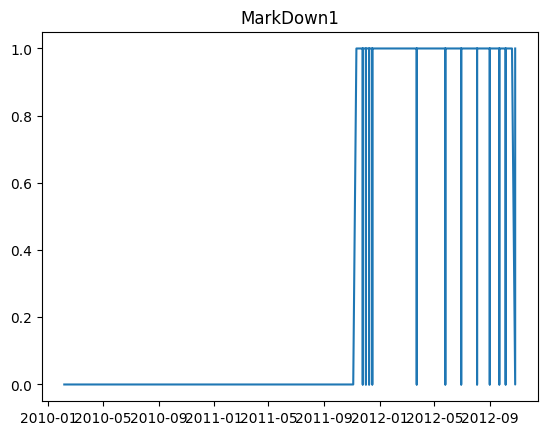

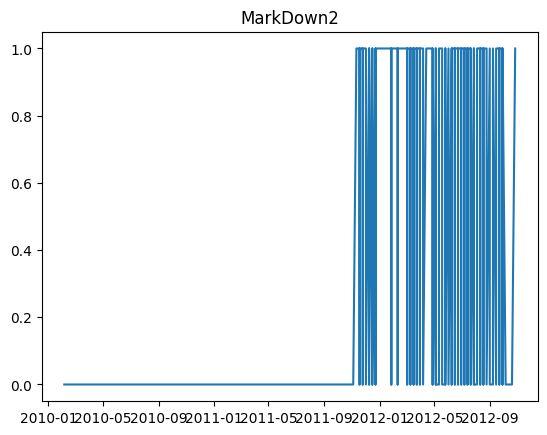

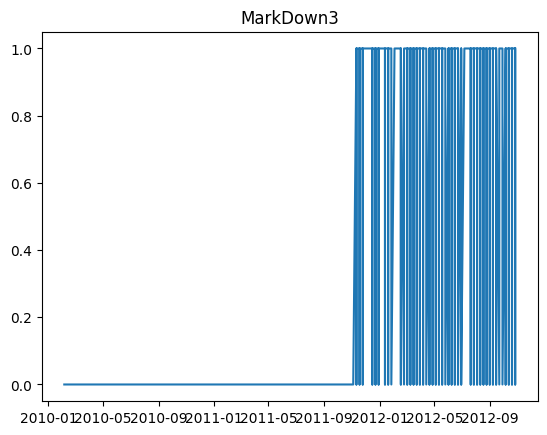

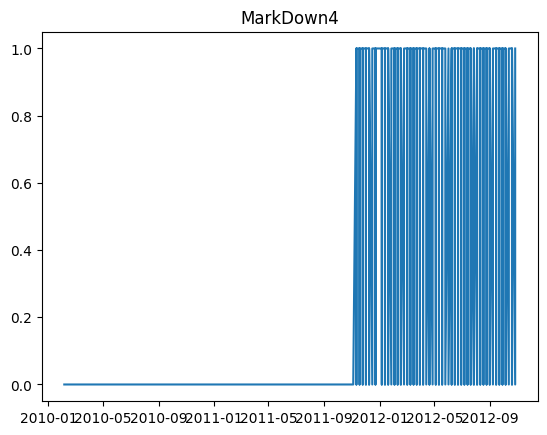

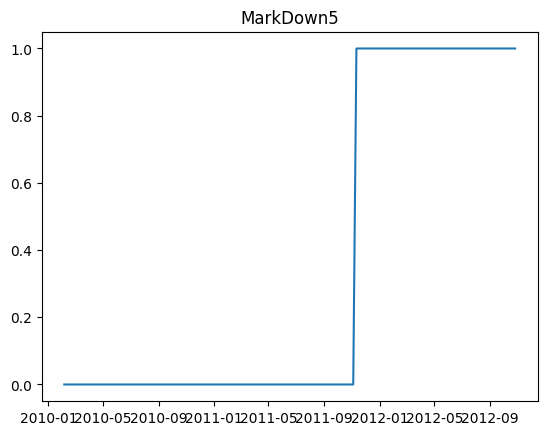

In [14]:
x = df.sort_values(by=["Date"])["Date"]


for column in df.columns:
    if df[column].isna().sum() > 0:
        plt.title(column)
        plt.plot(x, df.sort_values(by=["Date"])[column].isna().astype(int) * -1 + 1)
        plt.show()


As you can see, the MarkDown columns have lots of missing values in hafe of the weeks of the data

In [15]:
for column in df.columns:
    if df[column].isna().sum() > 0:
        print(column, df[column].isna().sum())
        df = df.drop(columns=[column])

df

MarkDown1 270889
MarkDown2 310322
MarkDown3 284479
MarkDown4 286603
MarkDown5 270138


Store  Dept       Date  Weekly_Sales  IsHoliday_x Type    Size  \
0           1     1 2010-02-05      24924.50        False    A  151315   
1           1     2 2010-02-05      50605.27        False    A  151315   
2           1     3 2010-02-05      13740.12        False    A  151315   
3           1     4 2010-02-05      39954.04        False    A  151315   
4           1     5 2010-02-05      32229.38        False    A  151315   
...       ...   ...        ...           ...          ...  ...     ...   
421565     45    93 2012-10-26       2487.80        False    B  118221   
421566     45    94 2012-10-26       5203.31        False    B  118221   
421567     45    95 2012-10-26      56017.47        False    B  118221   
421568     45    97 2012-10-26       6817.48        False    B  118221   
421569     45    98 2012-10-26       1076.80        False    B  118221   

        Temperature  Fuel_Price         CPI  Unemployment  IsHoliday_y  
0             42.31       2.572  211.096358         8.106        False  
1             42.31       2.572  211.096358         8.106        False  
2             42.31       2.572  211.096358         8.106        False  
3             42.31       2.572  211.096358         8.106        False  
4             42.31       2.572  211.096358         8.106        False  
...             ...         ...         ...           ...          ...  
421565        58.85       3.882  192.308899         8.667        False  
421566        58.85       3.882  192.308899         8.667        False  
421567        58.85       3.882  192.308899         8.667        False  
421568        58.85       3.882  192.308899         8.667        False  
421569        58.85       3.882  192.308899         8.667        False  

[421570 rows x 12 columns]

## First Describe of the data

In [16]:
df.head()

Store  Dept       Date  Weekly_Sales  IsHoliday_x Type    Size  \
0      1     1 2010-02-05      24924.50        False    A  151315   
1      1     2 2010-02-05      50605.27        False    A  151315   
2      1     3 2010-02-05      13740.12        False    A  151315   
3      1     4 2010-02-05      39954.04        False    A  151315   
4      1     5 2010-02-05      32229.38        False    A  151315   

   Temperature  Fuel_Price         CPI  Unemployment  IsHoliday_y  
0        42.31       2.572  211.096358         8.106        False  
1        42.31       2.572  211.096358         8.106        False  
2        42.31       2.572  211.096358         8.106        False  
3        42.31       2.572  211.096358         8.106        False  
4        42.31       2.572  211.096358         8.106        False

In [17]:
df.describe()

Store           Dept   Weekly_Sales           Size  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546      44.260317   15981.258123  136727.915739   
std        12.785297      30.492054   22711.183519   60980.583328   
min         1.000000       1.000000   -4988.940000   34875.000000   
25%        11.000000      18.000000    2079.650000   93638.000000   
50%        22.000000      37.000000    7612.030000  140167.000000   
75%        33.000000      74.000000   20205.852500  202505.000000   
max        45.000000      99.000000  693099.360000  219622.000000   

         Temperature     Fuel_Price            CPI   Unemployment  
count  421570.000000  421570.000000  421570.000000  421570.000000  
mean       60.090059       3.361027     171.201947       7.960289  
std        18.447931       0.458515      39.159276       1.863296  
min        -2.060000       2.472000     126.064000       3.879000  
25%        46.680000       2.933000     132.022667       6.891000  
50%        62.090000       3.452000     182.318780       7.866000  
75%        74.280000       3.738000     212.416993       8.572000  
max       100.140000       4.468000     227.232807      14.313000

In [18]:
df["IsHoliday"] = df["IsHoliday_x"]
df = df.drop(columns=["IsHoliday_x", "IsHoliday_y"])

In [19]:
df["Store-Type"] = df["Type"]
df["Store-Size"] = df["Size"]

df = df.drop(columns=["Type", "Size"])

In [20]:
df["Store-Type"] = df["Store-Type"].map({'A': 1, 'B': 2, 'C': 3})

In [21]:
df

Store  Dept       Date  Weekly_Sales  Temperature  Fuel_Price  \
0           1     1 2010-02-05      24924.50        42.31       2.572   
1           1     2 2010-02-05      50605.27        42.31       2.572   
2           1     3 2010-02-05      13740.12        42.31       2.572   
3           1     4 2010-02-05      39954.04        42.31       2.572   
4           1     5 2010-02-05      32229.38        42.31       2.572   
...       ...   ...        ...           ...          ...         ...   
421565     45    93 2012-10-26       2487.80        58.85       3.882   
421566     45    94 2012-10-26       5203.31        58.85       3.882   
421567     45    95 2012-10-26      56017.47        58.85       3.882   
421568     45    97 2012-10-26       6817.48        58.85       3.882   
421569     45    98 2012-10-26       1076.80        58.85       3.882   

               CPI  Unemployment  IsHoliday  Store-Type  Store-Size  
0       211.096358         8.106      False           1      151315  
1       211.096358         8.106      False           1      151315  
2       211.096358         8.106      False           1      151315  
3       211.096358         8.106      False           1      151315  
4       211.096358         8.106      False           1      151315  
...            ...           ...        ...         ...         ...  
421565  192.308899         8.667      False           2      118221  
421566  192.308899         8.667      False           2      118221  
421567  192.308899         8.667      False           2      118221  
421568  192.308899         8.667      False           2      118221  
421569  192.308899         8.667      False           2      118221  

[421570 rows x 11 columns]

In [22]:
df["index-2"] = df.index
df["Store-Dept"] = df["Store"].astype(str) + "-" + df["Dept"].astype(str)
df = df.sort_values(by=["Store-Dept", "Date"])

In [23]:
for i in range(1, 5):
    df["Weekly-Sales-last-" + str(i) + "-weeks"] = df["Weekly_Sales"].shift(i)

for i in range(1, 4):
    df["Weekly-Diff-last-" + str(i) + "-weeks"] = df["Weekly-Sales-last-" + str(i) + "-weeks"] - df["Weekly-Sales-last-" + str(i+1) + "-weeks"]

df["Weekly-Diff"] = df["Weekly_Sales"] - df["Weekly_Sales"].shift(1)

df = df.drop(index=df.head(6).index)

In [24]:
for i in range(4):
    df = df.drop(index=df[df["Store-Dept"] != df["Store-Dept"].shift(i+1)].index)

In [25]:
df.index = df["index-2"]
df = df.drop(columns=["index-2"])

In [26]:
df["IsHoliday"] = df["IsHoliday"].map({True: 1, False: 0})

In [27]:
df = df.drop(columns=["Store-Dept"])

In [28]:
df = df.drop(columns=["Weekly_Sales"])

In [29]:
df

Store  Dept       Date  Temperature  Fuel_Price         CPI  \
index-2                                                                
1155         1     1 2010-05-28        80.44       2.759  210.896761   
1225         1     1 2010-06-04        80.69       2.705  211.176428   
1296         1     1 2010-06-11        80.43       2.668  211.456095   
1367         1     1 2010-06-18        84.11       2.637  211.453772   
1436         1     1 2010-06-25        84.34       2.653  211.338653   
...        ...   ...        ...          ...         ...         ...   
87523        9    96 2012-10-26        69.52       3.506  227.232807   
84767        9    98 2011-12-23        44.43       3.112  223.066113   
84895        9    98 2012-01-06        47.54       3.157  223.433241   
85083        9    98 2012-01-27        49.38       3.290  223.806053   
86086        9    98 2012-05-18        69.52       3.630  225.494250   

         Unemployment  IsHoliday  Store-Type  Store-Size  \
index-2                                                    
1155            7.808          0           1      151315   
1225            7.808          0           1      151315   
1296            7.808          0           1      151315   
1367            7.808          0           1      151315   
1436            7.808          0           1      151315   
...               ...        ...         ...         ...   
87523           4.954          0           2      125833   
84767           6.054          0           2      125833   
84895           5.667          0           2      125833   
85083           5.667          0           2      125833   
86086           5.539          0           2      125833   

         Weekly-Sales-last-1-weeks  Weekly-Sales-last-2-weeks  \
index-2                                                         
1155                      14773.04                   18926.74   
1225                      15580.43                   14773.04   
1296                      17558.09                   15580.43   
1367                      16637.62                   17558.09   
1436                      16216.27                   16637.62   
...                            ...                        ...   
87523                      3540.05                    3675.99   
84767                        66.75                      75.77   
84895                        25.50                      66.75   
85083                         0.50                      25.50   
86086                        -1.00                       0.50   

         Weekly-Sales-last-3-weeks  Weekly-Sales-last-4-weeks  \
index-2                                                         
1155                      17413.94                   16555.11   
1225                      18926.74                   17413.94   
1296                      14773.04                   18926.74   
1367                      15580.43                   14773.04   
1436                      17558.09                   15580.43   
...                            ...                        ...   
87523                      4306.43                    3763.21   
84767                        54.75                      60.75   
84895                        75.77                      54.75   
85083                        66.75                      75.77   
86086                        25.50                      66.75   

         Weekly-Diff-last-1-weeks  Weekly-Diff-last-2-weeks  \
index-2                                                       
1155                     -4153.70                   1512.80   
1225                       807.39                  -4153.70   
1296                      1977.66                    807.39   
1367                      -920.47                   1977.66   
1436                      -421.35                   -920.47   
...                           ...                       ...   
87523                     -135.94                   -630.44   
84767                       -9.0

# split to train and test

In [30]:
sorted_dates = df.sort_values(by="Date")["Date"]
sorted_dates = sorted_dates.reset_index()["Date"]

limit_date = sorted_dates.head(int(sorted_dates.count() * 0.8)).max()
final_test_df = df[df["Date"] > limit_date].copy()
df = df[df["Date"] <= limit_date].copy()

df = df.reset_index()

In [31]:
sorted_dates = df.sort_values(by="Date")["Date"]
sorted_dates = sorted_dates.reset_index()["Date"]

limit_date = sorted_dates.head(int(sorted_dates.count() * 0.8)).max()

train_df = df[df["Date"] <= limit_date].copy()
test_df = df[df["Date"] > limit_date].copy()

train_df = train_df.reset_index()
test_df = test_df.reset_index()

In [32]:
df["Date"].sort_values().unique()

array(['2010-04-16T00:00:00.000000000', '2010-04-23T00:00:00.000000000',
       '2010-04-30T00:00:00.000000000', '2010-05-07T00:00:00.000000000',
       '2010-05-14T00:00:00.000000000', '2010-05-21T00:00:00.000000000',
       '2010-05-28T00:00:00.000000000', '2010-06-04T00:00:00.000000000',
       '2010-06-11T00:00:00.000000000', '2010-06-18T00:00:00.000000000',
       '2010-06-25T00:00:00.000000000', '2010-07-02T00:00:00.000000000',
       '2010-07-09T00:00:00.000000000', '2010-07-16T00:00:00.000000000',
       '2010-07-23T00:00:00.000000000', '2010-07-30T00:00:00.000000000',
       '2010-08-06T00:00:00.000000000', '2010-08-13T00:00:00.000000000',
       '2010-08-20T00:00:00.000000000', '2010-08-27T00:00:00.000000000',
       '2010-09-03T00:00:00.000000000', '2010-09-10T00:00:00.000000000',
       '2010-09-17T00:00:00.000000000', '2010-09-24T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-10-08T00:00:00.000000000',
       '2010-10-15T00:00:00.000000000', '2010-10-22

In [33]:
train_df["Date"].sort_values().unique()

array(['2010-04-16T00:00:00.000000000', '2010-04-23T00:00:00.000000000',
       '2010-04-30T00:00:00.000000000', '2010-05-07T00:00:00.000000000',
       '2010-05-14T00:00:00.000000000', '2010-05-21T00:00:00.000000000',
       '2010-05-28T00:00:00.000000000', '2010-06-04T00:00:00.000000000',
       '2010-06-11T00:00:00.000000000', '2010-06-18T00:00:00.000000000',
       '2010-06-25T00:00:00.000000000', '2010-07-02T00:00:00.000000000',
       '2010-07-09T00:00:00.000000000', '2010-07-16T00:00:00.000000000',
       '2010-07-23T00:00:00.000000000', '2010-07-30T00:00:00.000000000',
       '2010-08-06T00:00:00.000000000', '2010-08-13T00:00:00.000000000',
       '2010-08-20T00:00:00.000000000', '2010-08-27T00:00:00.000000000',
       '2010-09-03T00:00:00.000000000', '2010-09-10T00:00:00.000000000',
       '2010-09-17T00:00:00.000000000', '2010-09-24T00:00:00.000000000',
       '2010-10-01T00:00:00.000000000', '2010-10-08T00:00:00.000000000',
       '2010-10-15T00:00:00.000000000', '2010-10-22

In [34]:
test_df["Date"].sort_values().unique()

array(['2011-12-09T00:00:00.000000000', '2011-12-16T00:00:00.000000000',
       '2011-12-23T00:00:00.000000000', '2011-12-30T00:00:00.000000000',
       '2012-01-06T00:00:00.000000000', '2012-01-13T00:00:00.000000000',
       '2012-01-20T00:00:00.000000000', '2012-01-27T00:00:00.000000000',
       '2012-02-03T00:00:00.000000000', '2012-02-10T00:00:00.000000000',
       '2012-02-17T00:00:00.000000000', '2012-02-24T00:00:00.000000000',
       '2012-03-02T00:00:00.000000000', '2012-03-09T00:00:00.000000000',
       '2012-03-16T00:00:00.000000000', '2012-03-23T00:00:00.000000000',
       '2012-03-30T00:00:00.000000000', '2012-04-06T00:00:00.000000000',
       '2012-04-13T00:00:00.000000000', '2012-04-20T00:00:00.000000000',
       '2012-04-27T00:00:00.000000000'], dtype='datetime64[ns]')

In [35]:
mean_size = train_df["Store-Size"].mean()
std_size = train_df["Store-Size"].std()
train_df["Store-Size"] = (train_df["Store-Size"] - mean_size) / std_size
test_df["Store-Size"] = (test_df["Store-Size"] - mean_size) / std_size

In [36]:
train_df = train_df.drop(columns=["index-2"])
test_df = test_df.drop(columns=["index-2"])

In [37]:
train_df.head()

index  Store  Dept       Date  Temperature  Fuel_Price         CPI  \
0      0      1     1 2010-05-28        80.44       2.759  210.896761   
1      1      1     1 2010-06-04        80.69       2.705  211.176428   
2      2      1     1 2010-06-11        80.43       2.668  211.456095   
3      3      1     1 2010-06-18        84.11       2.637  211.453772   
4      4      1     1 2010-06-25        84.34       2.653  211.338653   

   Unemployment  IsHoliday  Store-Type  Store-Size  Weekly-Sales-last-1-weeks  \
0         7.808          0           1    0.233352                   14773.04   
1         7.808          0           1    0.233352                   15580.43   
2         7.808          0           1    0.233352                   17558.09   
3         7.808          0           1    0.233352                   16637.62   
4         7.808          0           1    0.233352                   16216.27   

   Weekly-Sales-last-2-weeks  Weekly-Sales-last-3-weeks  \
0                   18926.74                   17413.94   
1                   14773.04                   18926.74   
2                   15580.43                   14773.04   
3                   17558.09                   15580.43   
4                   16637.62                   17558.09   

   Weekly-Sales-last-4-weeks  Weekly-Diff-last-1-weeks  \
0                   16555.11                  -4153.70   
1                   17413.94                    807.39   
2                   18926.74                   1977.66   
3                   14773.04                   -920.47   
4                   15580.43                   -421.35   

   Weekly-Diff-last-2-weeks  Weekly-Diff-last-3-weeks  Weekly-Diff  
0                   1512.80                    858.83       807.39  
1                  -4153.70                   1512.80      1977.66  
2                    807.39                  -4153.70      -920.47  
3                   1977.66                    807.39      -421.35  
4                   -920.47                   1977.66       112.45

In [38]:
test_df.head()

index  Store  Dept       Date  Temperature  Fuel_Price         CPI  \
0     80      1     1 2011-12-09        43.93       3.158  218.961846   
1     81      1     1 2011-12-16        51.63       3.159  219.179453   
2     82      1     1 2011-12-23        47.96       3.112  219.357722   
3     83      1     1 2011-12-30        44.55       3.129  219.535990   
4     84      1     1 2012-01-06        49.01       3.157  219.714258   

   Unemployment  IsHoliday  Store-Type  Store-Size  Weekly-Sales-last-1-weeks  \
0         7.866          0           1    0.233352                   25293.49   
1         7.866          0           1    0.233352                   33305.92   
2         7.866          0           1    0.233352                   45773.03   
3         7.866          1           1    0.233352                   46788.75   
4         7.348          0           1    0.233352                   23350.88   

   Weekly-Sales-last-2-weeks  Weekly-Sales-last-3-weeks  \
0                   20911.25                   19050.66   
1                   25293.49                   20911.25   
2                   33305.92                   25293.49   
3                   45773.03                   33305.92   
4                   46788.75                   45773.03   

   Weekly-Sales-last-4-weeks  Weekly-Diff-last-1-weeks  \
0                   18689.54                   4382.24   
1                   19050.66                   8012.43   
2                   20911.25                  12467.11   
3                   25293.49                   1015.72   
4                   33305.92                 -23437.87   

   Weekly-Diff-last-2-weeks  Weekly-Diff-last-3-weeks  Weekly-Diff  
0                   1860.59                    361.12      8012.43  
1                   4382.24                   1860.59     12467.11  
2                   8012.43                   4382.24      1015.72  
3                  12467.11                   8012.43    -23437.87  
4                   1015.72                  12467.11     -6783.19

## Visualize the data

In [39]:
def date_show(date_value):
    return str(date_value).split(" ")[0].split('-')[2] + '-' + str(date_value).split(" ")[0].split('-')[1]

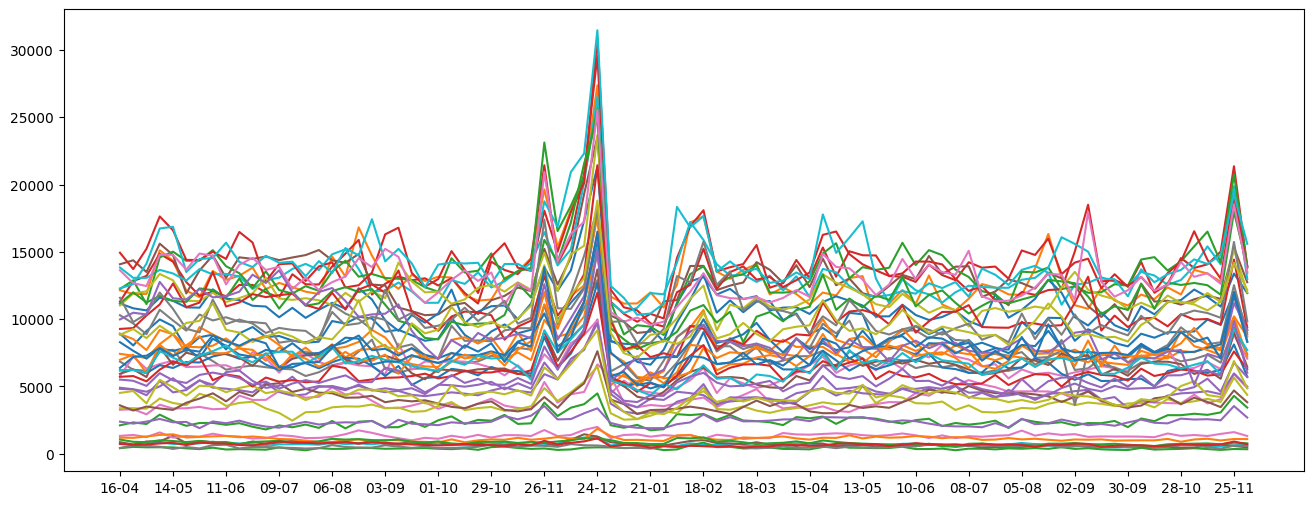

In [40]:
view_df = train_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = (dept_view_df["Weekly-Sales-last-1-weeks"] + dept_view_df["Weekly-Diff"])
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index[::4], labels=labels[::4])
        first_iteration = False

    xy = xy.fillna(0)

    plt.plot(xy.index, xy.median(axis=1))

plt.show()

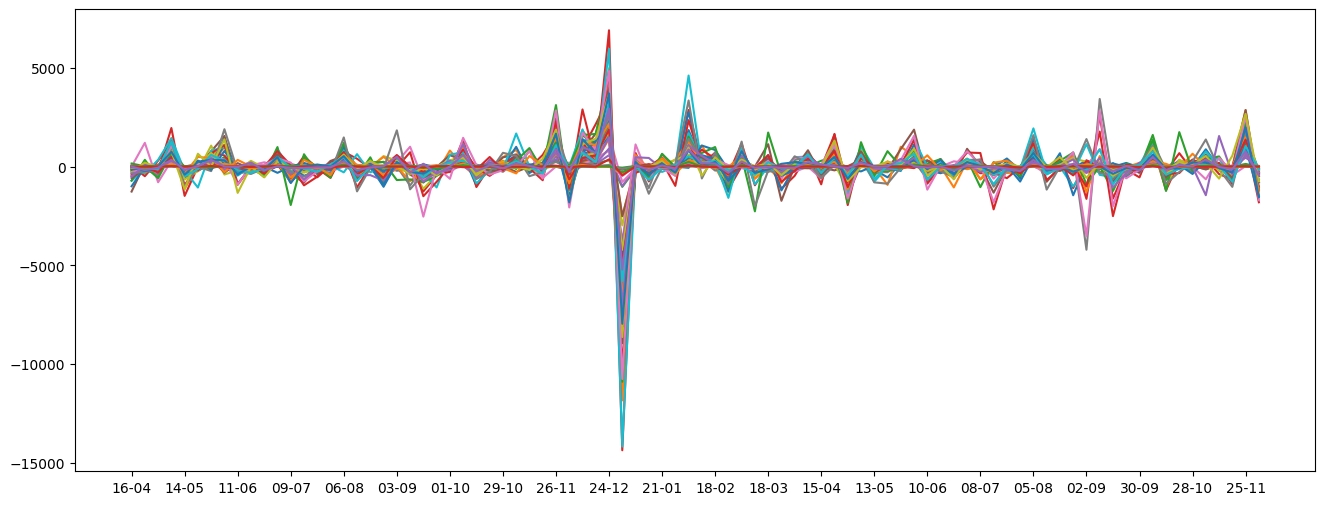

In [41]:
view_df = train_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = dept_view_df["Weekly-Diff"]
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index[::4], labels=labels[::4])
        first_iteration = False

    xy = xy.fillna(0)

    plt.plot(xy.index, xy.median(axis=1))

plt.show()

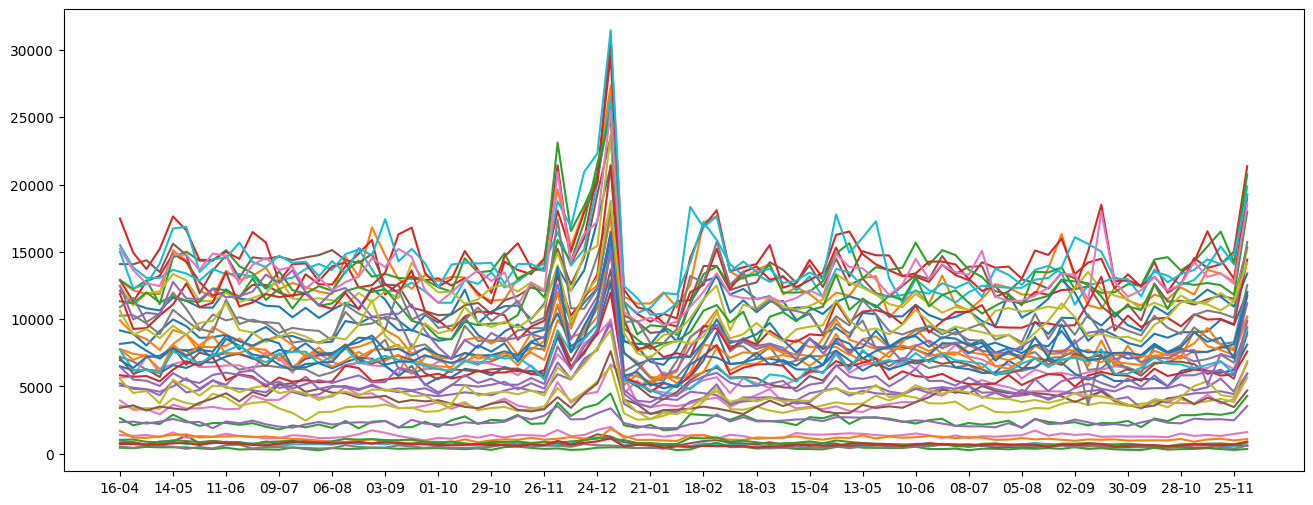

In [42]:
view_df = train_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = dept_view_df["Weekly-Sales-last-1-weeks"]
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index[::4], labels=labels[::4])
        first_iteration = False

    xy = xy.fillna(0)

    plt.plot(xy.index, xy.median(axis=1))

plt.show()

We now known that the weeks of Thanksgiving Day and Christmas are extreme for sales for walmart

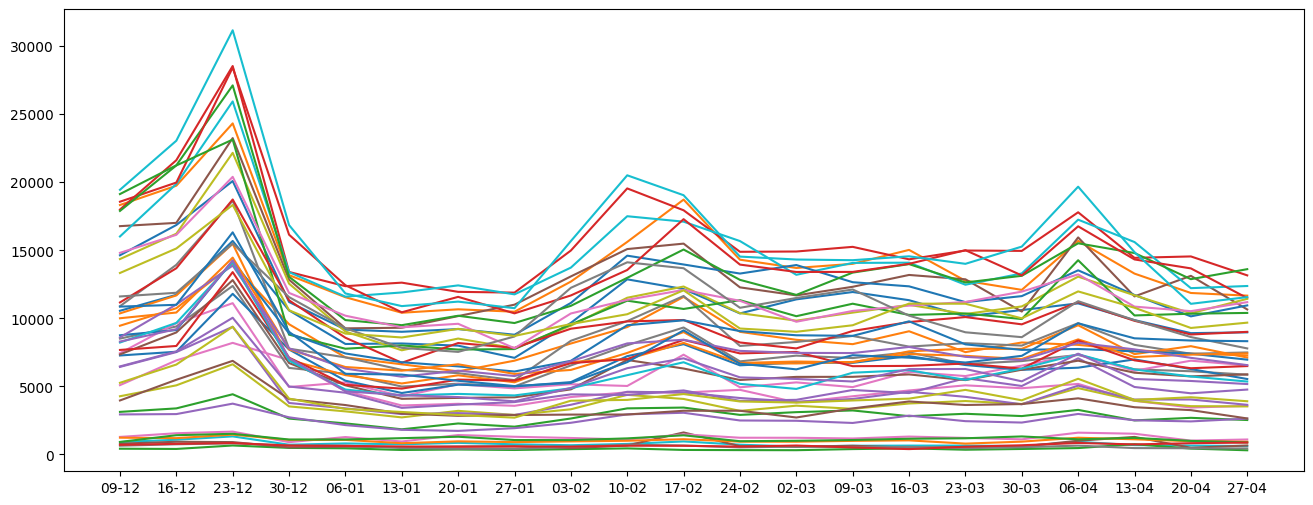

In [43]:
view_df = test_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = (dept_view_df["Weekly-Sales-last-1-weeks"] + dept_view_df["Weekly-Diff"])
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index, labels=labels)
        first_iteration = False

    xy = xy.fillna(0)

    plt.plot(xy.index, xy.median(axis=1))

plt.show()

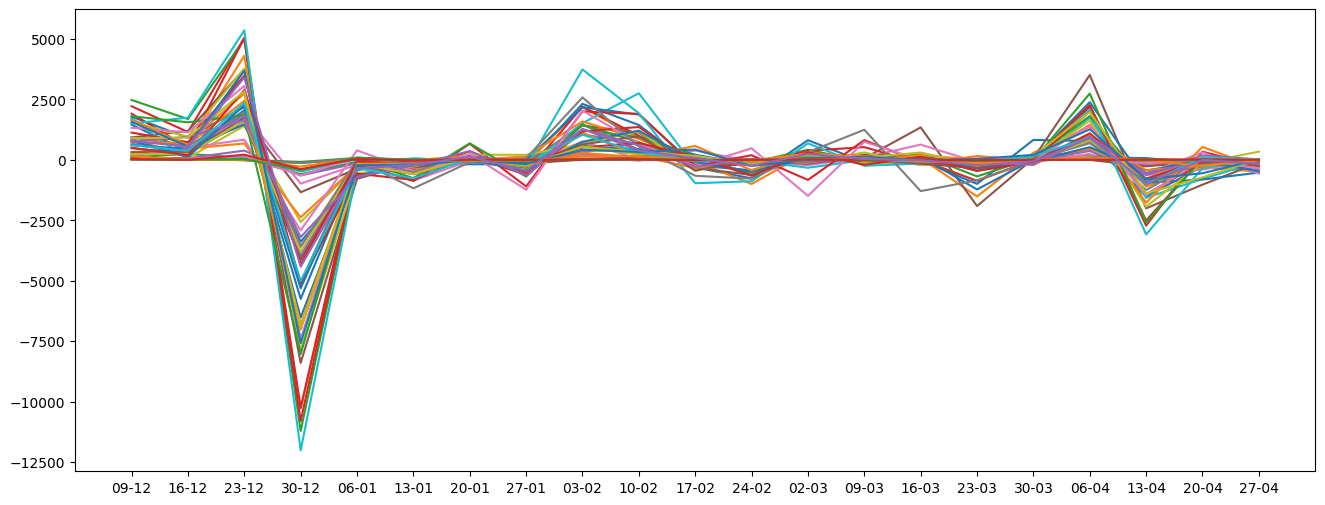

In [44]:
view_df = test_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = dept_view_df["Weekly-Diff"]
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index, labels=labels)
        first_iteration = False

    xy = xy.fillna(0)

    plt.plot(xy.index, xy.median(axis=1))

plt.show()

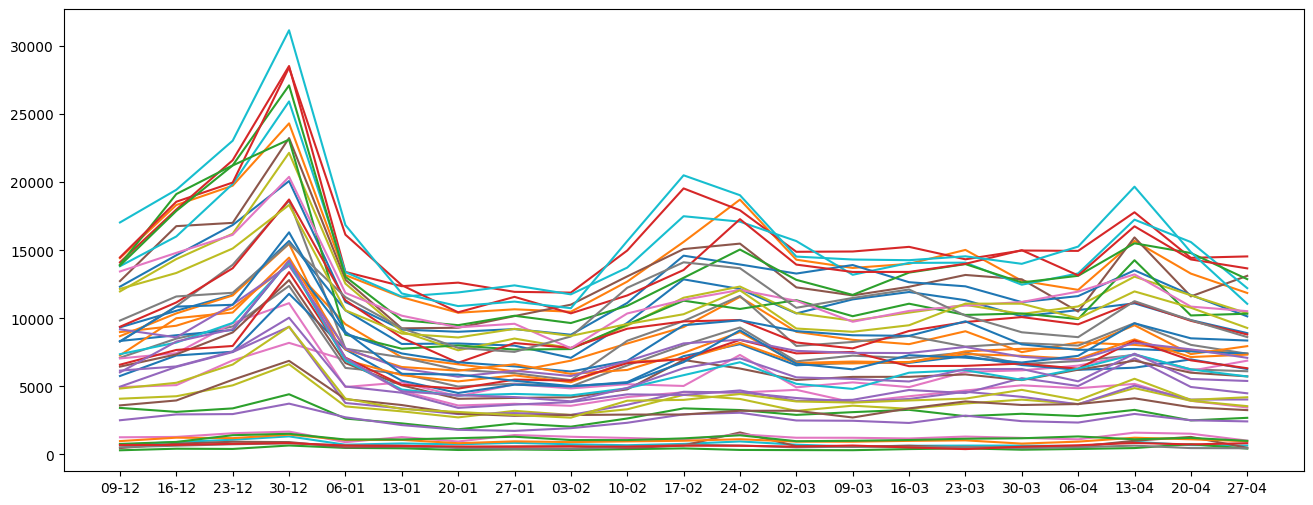

In [45]:
view_df = test_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[view_df["Store"] == store]

    index = store_view_df["DN"].sort_values().unique()
    labels = store_view_df.sort_values(by=["DN"])["Date"].drop_duplicates().apply(date_show)

    xy = pd.DataFrame(index=index)
    i = 0

    for dept in store_view_df["Dept"].sort_values().unique():
        dept_view_df = store_view_df[store_view_df["Dept"] == dept]
        dept_view_df = dept_view_df.set_index("DN")

        y = dept_view_df["Weekly-Sales-last-1-weeks"]
        xy[str(dept)] = y

    if first_iteration:
        plt.xticks(ticks=index, labels=labels)
        first_iteration = False

    xy = xy.fillna(0)

    plt.plot(xy.index, xy.median(axis=1))

plt.show()

other

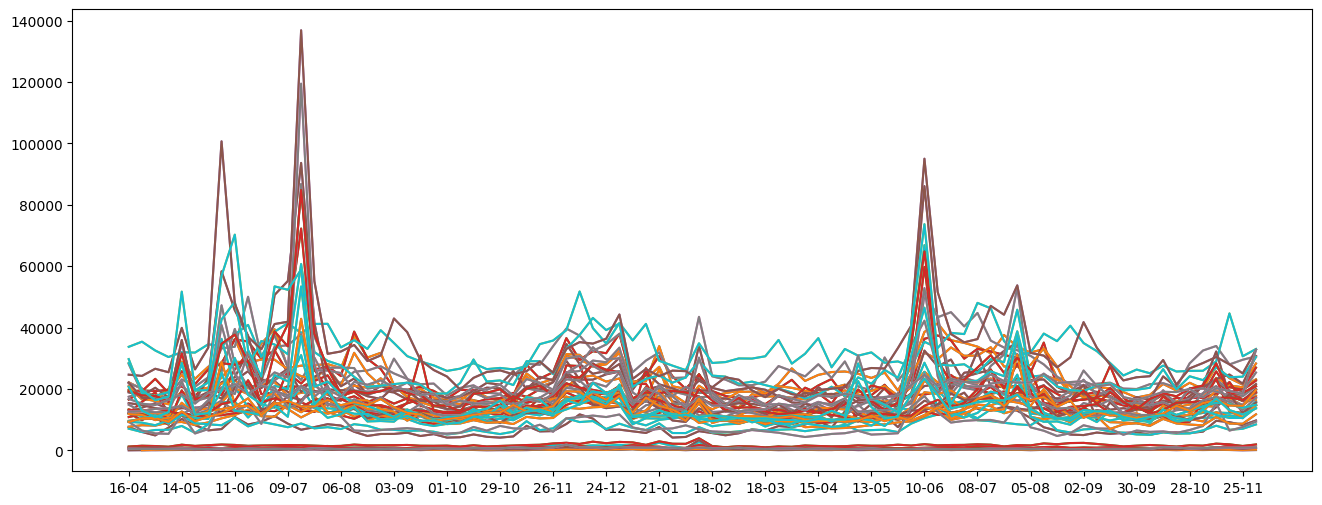

In [46]:
DEPT = 11

view_df = train_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for store in view_df["Store"].sort_values().unique():
    store_view_df = view_df[(view_df["Store"] == store) & (view_df["Dept"] == DEPT)]

    labels = store_view_df["Date"].apply(date_show)
    x = store_view_df["DN"]
    y = store_view_df["Weekly-Sales-last-1-weeks"]

    plt.plot(x, y)
    if first_iteration:
        plt.xticks(ticks=x[::4], labels=labels[::4])
        first_iteration = False

    plt.plot(x, y)

plt.show()

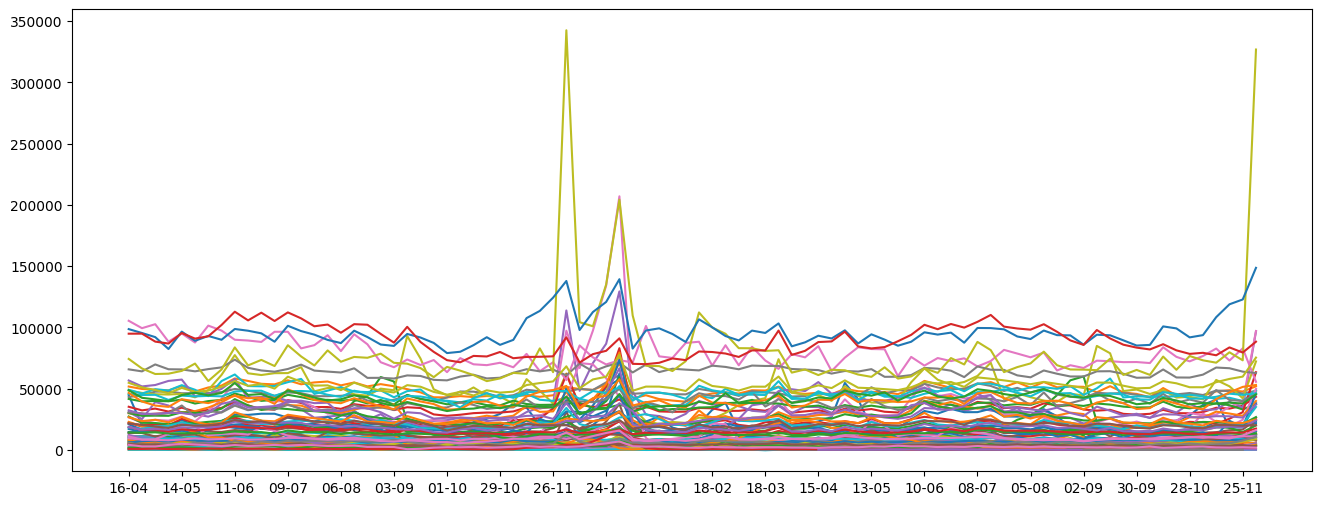

In [47]:
STORE = 6

view_df = train_df.copy()

view_df["DN"] = view_df["Date"].apply(lambda x: x.value)
view_df = view_df.sort_values(by=["DN"])

plt.figure(figsize=(16, 6))

first_iteration = True

for dept in view_df["Dept"].sort_values().unique():
    dept_view_df = view_df[(view_df["Store"] == STORE) & (view_df["Dept"] == dept)]

    labels = dept_view_df["Date"].apply(date_show)
    x = dept_view_df["DN"]
    y = dept_view_df["Weekly-Sales-last-1-weeks"]

    plt.plot(x, y)
    if first_iteration:
        plt.xticks(ticks=x[::4], labels=labels[::4])
        first_iteration = False

plt.show()

adding year as sin and cos

In [48]:
YEAR = pd.Timestamp('2001-01-01').value - pd.Timestamp('2000-01-01').value

train_df['Year-Sin'] = np.sin(train_df["Date"].apply(lambda x: x.value) * (2 * np.pi / YEAR))
train_df['Year-Cos'] = np.cos(train_df["Date"].apply(lambda x: x.value) * (2 * np.pi / YEAR))

test_df['Year-Sin'] = np.sin(test_df["Date"].apply(lambda x: x.value) * (2 * np.pi / YEAR))
test_df['Year-Cos'] = np.cos(test_df["Date"].apply(lambda x: x.value) * (2 * np.pi / YEAR))

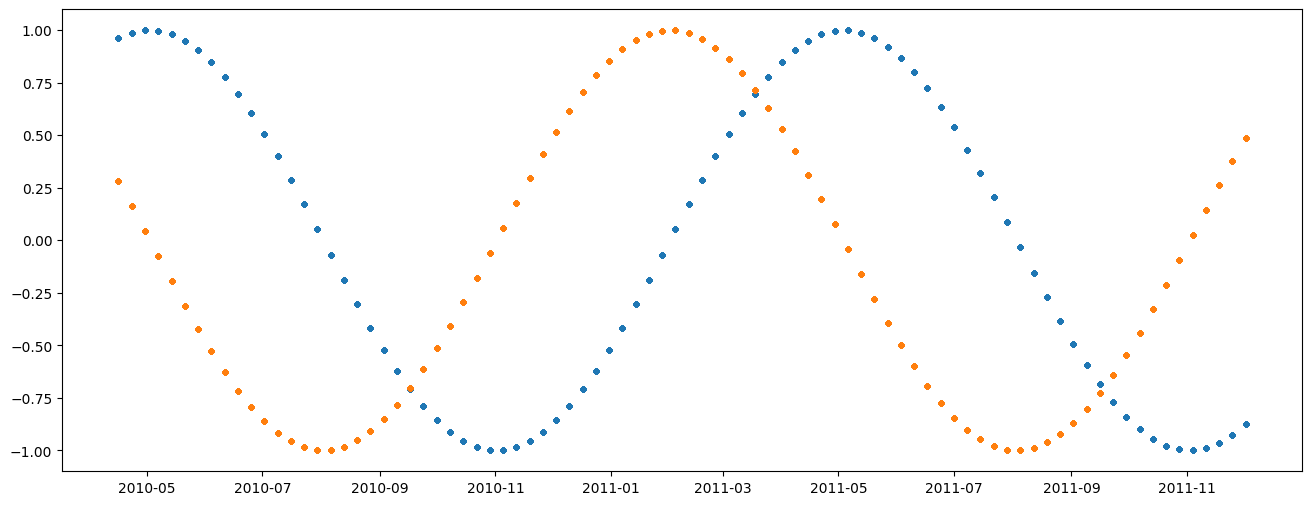

In [49]:
plt.figure(figsize=(16, 6))

plt.plot(train_df["Date"], train_df["Year-Sin"], '.')
plt.plot(train_df["Date"], train_df["Year-Cos"], '.')

plt.show()

## Model LinearRegression

In [49]:
train_1_df = train_df.copy()
test_1_df = test_df.copy()

In [50]:
for store in store_df["Store"].unique():
    train_1_df["Store-" + str(store)] = (train_1_df["Store"] == store).map({True: 1, False: 0})
    test_1_df["Store-" + str(store)] = (test_1_df["Store"] == store).map({True: 1, False: 0})

for dept in train_1_df["Dept"].unique():
    train_1_df["Dept-" + str(dept)] = (train_1_df["Dept"] == dept).map({True: 1, False: 0})
    test_1_df["Dept-" + str(dept)] = (test_1_df["Dept"] == dept).map({True: 1, False: 0})

<ipython-input-50-743699795622>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_1_df["Dept-" + str(dept)] = (train_1_df["Dept"] == dept).map({True: 1, False: 0})
<ipython-input-50-743699795622>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_1_df["Dept-" + str(dept)] = (test_1_df["Dept"] == dept).map({True: 1, False: 0})
<ipython-input-50-743699795622>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

In [51]:
train_1_df = train_1_df.drop(columns=["Store", "Dept"])
test_1_df = test_1_df.drop(columns=["Store", "Dept"])

In [52]:
train_1_df.columns

Index(['index', 'Date', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'IsHoliday', 'Store-Type', 'Store-Size', 'Weekly-Sales-last-1-weeks',
       ...
       'Dept-93', 'Dept-94', 'Dept-95', 'Dept-96', 'Dept-97', 'Dept-98',
       'Dept-99', 'Dept-50', 'Dept-78', 'Dept-65'],
      dtype='object', length=142)

In [53]:
train_1_df.columns.size, test_1_df.columns.size

(142, 142)

In [54]:
x_train = train_1_df.drop(columns=["Weekly-Diff"])
y_train = train_1_df["Weekly-Diff"]

x_test = test_1_df.drop(columns=["Weekly-Diff"])
y_test = test_1_df["Weekly-Diff"]

In [55]:
x_train["Date"] = x_train["Date"].apply(lambda x: x.value)
x_test["Date"] = x_test["Date"].apply(lambda x: x.value)

In [56]:
for column in x_train.columns:
    x_train[column] = x_train[column].astype(float)
    x_test[column] = x_test[column].astype(float)


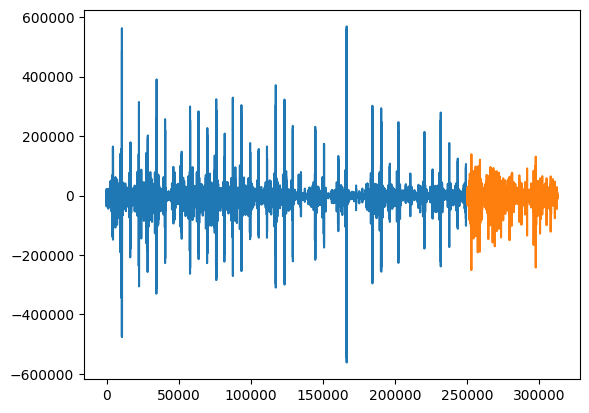

In [57]:
plt.plot(range(len(y_train)), y_train)
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test)

In [58]:
y_train.min(), y_test.min()

(-561345.54, -250560.69)

In [59]:
x_train_backup = x_train.copy()
y_train_backup = y_train.copy()

x_test_backup = x_test.copy()
y_test_backup = y_test.copy()

In [60]:
y_train.describe()

count    250289.000000
mean          8.252600
std        8246.597466
min     -561345.540000
25%        -630.130000
50%           1.530000
75%         670.340000
max      568347.700000
Name: Weekly-Diff, dtype: float64

In [61]:
class NormlizerStdMean:
    def __init__(self, x, y):
        self.y_mean = y.mean()
        self.y_std = y.std()

        self.x_mean = {}
        self.x_std = {}

        for column in x.columns:
            self.x_mean[column] = x[column].mean()
            self.x_std[column] = x[column].std()

    def normalize_y(self, v):
        return (v - self.y_mean) / self.y_std

    def normalize_x(self, v, column):
        return (v - self.x_mean[column]) / self.x_std[column]

    def denormalize_y(self, v):
        return list(map(lambda v0: (v0 * self.y_std) + self.y_mean, v))

    def denormalize_x(self, v, column):
        return list(map(lambda v0: (v0 * self.x_std[column]) + self.x_mean[column], v))

In [62]:
class NormlizerMinMax:
    def __init__(self, x, y):
        self.y_min = y.min()
        self.y_max = y.max()

        self.x_min = {}
        self.x_max = {}

        for column in x.columns:
            self.x_min[column] = x[column].min()
            self.x_max[column] = x[column].max()

    def normalize_y(self, v):
        return (v - self.y_min) / (self.y_max - self.y_min)

    def normalize_x(self, v, column):
        return (v - self.x_min[column]) / (self.x_max[column] - self.x_min[column])

    def denormalize_y(self, v):
        return list(map(lambda v0: (v0 * (self.y_max - self.y_min)) + self.y_min, v))

    def denormalize_x(self, v, column):
        return list(map(lambda v0: (v0 * (self.x_max[column] - self.x_min[column])) + self.x_min[column], v))

In [63]:
normlizer = NormlizerMinMax(x_train, y_train)

In [64]:
y_train = normlizer.normalize_y(y_train)
y_test = normlizer.normalize_y(y_test)

In [65]:
y_train.describe()

count    250289.000000
mean          0.496908
std           0.007300
min           0.000000
25%           0.496343
50%           0.496902
75%           0.497494
max           1.000000
Name: Weekly-Diff, dtype: float64

In [66]:
x_train.describe()

index          Date    Temperature     Fuel_Price  \
count  250289.000000  2.502890e+05  250289.000000  250289.000000   
mean   156205.058488  1.297193e+18      61.585433       3.257915   
std     90216.451196  1.499528e+16      18.457818       0.440627   
min         0.000000  1.271376e+18      -2.060000       2.513000   
25%     78117.000000  1.284077e+18      48.720000       2.841000   
50%    156184.000000  1.297382e+18      64.190000       3.232000   
75%    234323.000000  1.310083e+18      75.320000       3.638000   
max    312504.000000  1.322784e+18     100.140000       4.211000   

                 CPI   Unemployment      IsHoliday     Store-Type  \
count  250289.000000  250289.000000  250289.000000  250289.000000   
mean      169.560455       8.216114       0.070263       1.586522   
std        38.424753       1.873331       0.255590       0.664023   
min       126.064000       4.420000       0.000000       1.000000   
25%       132.364839       7.274000       0.000000       1.000000   
50%       182.380600       8.021000       0.000000       1.000000   
75%       211.169023       8.625000       0.000000       2.000000   
max       222.397544      14.313000       1.000000       3.000000   

         Store-Size  Weekly-Sales-last-1-weeks  ...        Dept-93  \
count  2.502890e+05              250289.000000  ...  250289.000000   
mean   7.903467e-17               16084.005536  ...       0.014052   
std    1.000000e+00               22799.863091  ...       0.117705   
min   -1.680818e+00               -4988.940000  ...       0.000000   
25%   -7.148066e-01                2228.900000  ...       0.000000   
50%    5.008847e-02                7783.090000  ...       0.000000   
75%    1.074869e+00               20349.200000  ...       0.000000   
max    1.356257e+00              693099.360000  ...       1.000000   

             Dept-94        Dept-95        Dept-96        Dept-97  \
count  250289.000000  250289.000000  250289.000000  250289.000000   
mean        0.013037       0.015462       0.011255       0.015027   
std         0.113433       0.123382       0.105491       0.121659   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

             Dept-98        Dept-99        Dept-50        Dept-78  \
count  250289.000000  250289.000000  250289.000000  250289.000000   
mean        0.013596       0.000212       0.003676       0.000008   
std         0.115808       0.014550       0.060517       0.002827   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

             Dept-65  
count  250289.000000  
mean        0.000344  
std         0.018533  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 141 columns]

In [67]:
for column in x_train.columns:
    if x_train[column].max() > 1:
        x_train[column] = normlizer.normalize_x(x_train[column], column)
        x_test[column] = normlizer.normalize_x(x_test[column], column)

In [68]:
x_train.describe()

index           Date    Temperature     Fuel_Price  \
count  250289.000000  250289.000000  250289.000000  250289.000000   
mean        0.499850       0.502189       0.622754       0.438702   
std         0.288689       0.291691       0.180605       0.259497   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.249971       0.247059       0.496869       0.193168   
50%         0.499782       0.505882       0.648239       0.423439   
75%         0.749824       0.752941       0.757143       0.662544   
max         1.000000       1.000000       1.000000       1.000000   

                 CPI   Unemployment      IsHoliday     Store-Type  \
count  250289.000000  250289.000000  250289.000000  250289.000000   
mean        0.451519       0.383717       0.070263       0.293261   
std         0.398872       0.189359       0.255590       0.332011   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.065406       0.288487       0.000000       0.000000   
50%         0.584600       0.363995       0.000000       0.000000   
75%         0.883441       0.425048       0.000000       0.500000   
max         1.000000       1.000000       1.000000       1.000000   

          Store-Size  Weekly-Sales-last-1-weeks  ...        Dept-93  \
count  250289.000000              250289.000000  ...  250289.000000   
mean        0.553433                   0.030187  ...       0.014052   
std         0.329264                   0.032660  ...       0.117705   
min         0.000000                   0.000000  ...       0.000000   
25%         0.318073                   0.010339  ...       0.000000   
50%         0.569925                   0.018296  ...       0.000000   
75%         0.907349                   0.036296  ...       0.000000   
max         1.000000                   1.000000  ...       1.000000   

             Dept-94        Dept-95        Dept-96        Dept-97  \
count  250289.000000  250289.000000  250289.000000  250289.000000   
mean        0.013037       0.015462       0.011255       0.015027   
std         0.113433       0.123382       0.105491       0.121659   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

             Dept-98        Dept-99        Dept-50        Dept-78  \
count  250289.000000  250289.000000  250289.000000  250289.000000   
mean        0.013596       0.000212       0.003676       0.000008   
std         0.115808       0.014550       0.060517       0.002827   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

             Dept-65  
count  250289.000000  
mean        0.000344  
std         0.018533  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 141 columns]

In [69]:
x_train = torch.tensor(x_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)

x_test = torch.tensor(x_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [70]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([250289, 141]),
 torch.Size([250289]),
 torch.Size([62240, 141]),
 torch.Size([62240]))

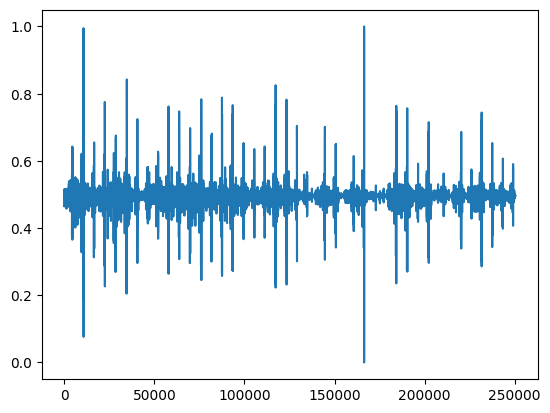

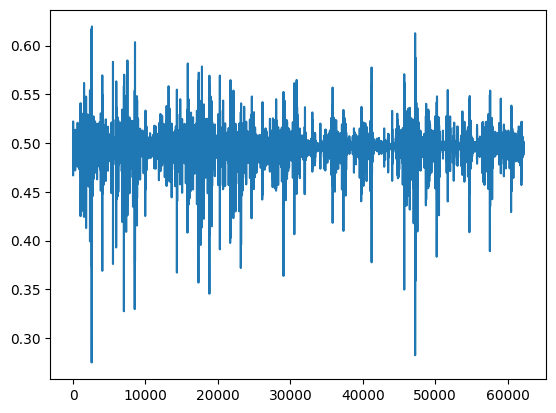

In [71]:
plt.plot(range(len(y_train)), y_train)
plt.show()

plt.plot(range(len(y_test)), y_test)
plt.show()

In [72]:
class LinearRegression(torch.nn.Module):
    def __init__(self, input_size):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, 1)

    def forward(self, x):
        out = self.linear(x)
        return out


def train_linear_regression_model(x_train, y_train, x_val, y_val, model, loss_fn, loss_fn_vall, num_epochs, batch_size):
    lr = 0.01

    # Define an optimizer (Stochastic Gradient Descent)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    train_dataset = torch.utils.data.TensorDataset(torch.tensor(x_train, dtype=torch.float32),
                                                   torch.tensor(y_train, dtype=torch.float32))
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    val_dataset = torch.utils.data.TensorDataset(torch.tensor(x_val, dtype=torch.float32),
                                                 torch.tensor(y_val, dtype=torch.float32))
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

    losses = []
    losses_val = []

    for epoch in range(num_epochs):
        running_loss = 0

        for batch in train_loader:
            inputs, targets = batch

            # Forward pass
            outputs = model(inputs)
            loss_train = loss_fn(outputs, targets)

            # Backward and optimize
            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()

            running_loss += np.sqrt(loss_train.item())

        losses.append(running_loss / len(train_loader))

        # Validation loss
        running_loss = 0

        for batch in val_loader:
            inputs, targets = batch

            # Forward pass
            outputs = model(inputs)
            loss_val = loss_fn_vall(outputs, targets)

            running_loss += np.sqrt(loss_val.item())

        losses_val.append(running_loss / len(val_loader))

        # try me
        for i, index in enumerate(stores_weight_indexs):
            stores_weight_trains[i].append(model.linear.weight[0, index].item())

        # Print some statistics
        if epoch % int(num_epochs / 10) == 0:
            print(f'Epoch [{epoch}], Running Loss: {running_loss:.4f}')

    return losses, losses_val


stores_weight_indexs = [i for i, col in enumerate(x_train_backup.columns) if "Store-" in col and not "Type" in col and not "Size" in col][2:-2]
stores_weight_trains = [[] for i in stores_weight_indexs]

linear_regression_model = LinearRegression(input_size=x_train.shape[1])
loss_fn = torch.nn.MSELoss()
loss_fn_vall = torch.nn.MSELoss()

batch_size = 128

losses, losses_val = train_linear_regression_model(x_train, y_train, x_test, y_test, linear_regression_model, loss_fn, loss_fn_vall, 30, batch_size)

<ipython-input-72-47e3da3bc9cd>:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = torch.utils.data.TensorDataset(torch.tensor(x_train, dtype=torch.float32),
<ipython-input-72-47e3da3bc9cd>:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(y_train, dtype=torch.float32))
<ipython-input-72-47e3da3bc9cd>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_dataset = torch.utils.data.TensorDataset(torch.tensor(x_val, dtype=torch.float32),
<ipython-input-72-47e3da3bc9cd>:22: UserWarning: To copy construct from a te

Epoch [0], Running Loss: 16.5183
Epoch [3], Running Loss: 7.1627
Epoch [6], Running Loss: 5.7292
Epoch [9], Running Loss: 5.1020
Epoch [12], Running Loss: 4.5916
Epoch [15], Running Loss: 4.3112
Epoch [18], Running Loss: 4.0641
Epoch [21], Running Loss: 3.9230
Epoch [24], Running Loss: 3.9245
Epoch [27], Running Loss: 3.7755


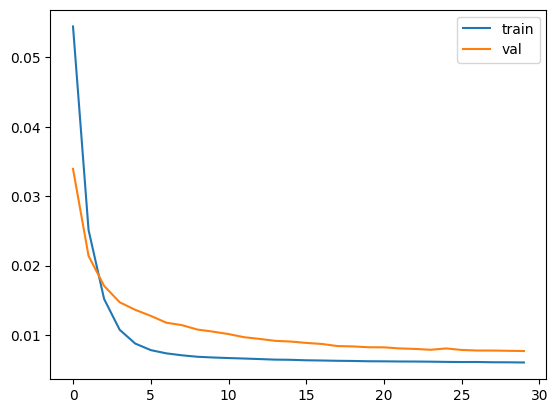

In [73]:
plt.plot(losses, label="train")
plt.plot(losses_val, label="val")
plt.legend()

In [74]:
x_train = x_train_backup.copy()
y_train = y_train_backup.copy()

x_test = x_test_backup.copy()
y_test = y_test_backup.copy()

In [75]:
def test_linear_regression_model(store, dept):
    # load data
    x_train = x_train_backup.copy()
    y_train = y_train_backup.copy()

    x_test = x_test_backup.copy()
    y_test = y_test_backup.copy()

    full_train_df = x_train
    full_train_df["Y"] = y_train

    full_test_df = x_test
    full_test_df["Y"] = y_test

    full_train_df = full_train_df.sort_values(by=["Date"])
    full_test_df = full_test_df.sort_values(by=["Date"])

    # slice data
    full_train_df = full_train_df[((full_train_df['Store-' + str(store)] == 1) & (full_train_df['Dept-' + str(dept)] == 1))]
    full_test_df = full_test_df[((full_test_df['Store-' + str(store)] == 1) & (full_test_df['Dept-' + str(dept)] == 1))]

    x_train = full_train_df.drop(columns=["Y"])
    y_train = full_train_df["Y"]

    x_test = full_test_df.drop(columns=["Y"])
    y_test = full_test_df["Y"]

    # normalize data
    y_train = normlizer.normalize_y(y_train)
    y_test = normlizer.normalize_y(y_test)

    for column in x_train.columns:
        if x_train[column].max() > 1:
            x_train[column] = normlizer.normalize_x(x_train[column], column)
            x_test[column] = normlizer.normalize_x(x_test[column], column)

    # convert for model
    x_train = torch.tensor(x_train.values, dtype=torch.float32)
    y_train = torch.tensor(y_train.values, dtype=torch.float32)

    x_test = torch.tensor(x_test.values, dtype=torch.float32)
    y_test = torch.tensor(y_test.values, dtype=torch.float32)

    # test model
    train_dataset = torch.utils.data.TensorDataset(torch.tensor(x_train, dtype=torch.float32),
                                                torch.tensor(y_train, dtype=torch.float32))
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)

    test_dataset = torch.utils.data.TensorDataset(torch.tensor(x_test, dtype=torch.float32),
                                                torch.tensor(y_test, dtype=torch.float32))
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

    sections = [train_loader, test_loader]

    results_dates = []
    results_target = []
    results_output = []

    for section_loader in sections:
        section_dates = []
        section_targets = []
        section_outputs = []
        for batch in section_loader:
            inputs, targets = batch

            outputs = linear_regression_model(inputs)

            section_dates += inputs[:, 1].detach().numpy().tolist()
            section_targets += targets.detach().numpy().tolist()
            section_outputs += map(lambda v: v[0], outputs.detach().numpy().tolist())

        results_dates.append(section_dates)
        results_target.append(section_targets)
        results_output.append(section_outputs)


    # plot results
    labels = ['true train', 'pred train', 'true test', 'pred test']

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    for i in range(len(sections)):
        ax1.plot(results_dates[i], results_target[i], label=labels[i * 2 + 0])
        ax1.plot(results_dates[i], results_output[i], label=labels[i * 2 + 1])

    ax1.legend()

    for i in range(len(sections)):
        x = normlizer.denormalize_x(results_dates[i], "Date")
        y1 = normlizer.denormalize_y(results_target[i])
        y2 = normlizer.denormalize_y(results_output[i])

        ax2.plot(x, y1, label=labels[i * 2 + 0])
        ax2.plot(x, y2, label=labels[i * 2 + 1])

    ax2.legend()

    plt.show()


<ipython-input-75-7f6140851692>:45: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_dataset = torch.utils.data.TensorDataset(torch.tensor(x_train, dtype=torch.float32),
<ipython-input-75-7f6140851692>:46: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(y_train, dtype=torch.float32))
<ipython-input-75-7f6140851692>:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_dataset = torch.utils.data.TensorDataset(torch.tensor(x_test, dtype=torch.float32),
<ipython-input-75-7f6140851692>:50: UserWarning: To copy construct from a 

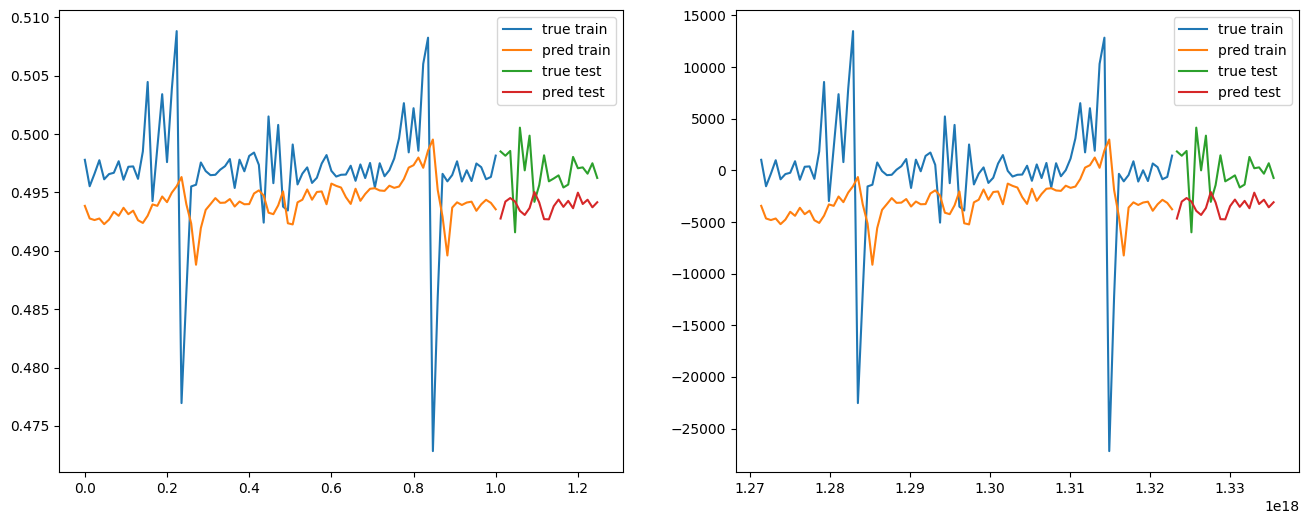

In [76]:
test_linear_regression_model(8, 3)

## LSTM Model

In [50]:
df = original_df.copy()

In [51]:
for store in df["Store"].unique():
    df["Store-" + str(store)] = (df["Store"] == store).map({True: 1, False: 0})

for dept in df["Dept"].unique():
    df["Dept-" + str(dept)] = (df["Dept"] == dept).map({True: 1, False: 0})

<ipython-input-51-ee9dad3566c8>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Dept-" + str(dept)] = (df["Dept"] == dept).map({True: 1, False: 0})
<ipython-input-51-ee9dad3566c8>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Dept-" + str(dept)] = (df["Dept"] == dept).map({True: 1, False: 0})
<ipython-input-51-ee9dad3566c8>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.

In [52]:
for column in df.columns:
    if df[column].isna().sum() > 0:
        print(column, df[column].isna().sum())
        df = df.drop(columns=[column])

MarkDown1 270889
MarkDown2 310322
MarkDown3 284479
MarkDown4 286603
MarkDown5 270138


In [53]:
df["IsHoliday"] = df["IsHoliday_x"]
df = df.drop(columns=["IsHoliday_x", "IsHoliday_y"])

<ipython-input-53-d96e69321d5b>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["IsHoliday"] = df["IsHoliday_x"]


In [54]:
df["Store-Type"] = df["Type"]
df["Store-Size"] = df["Size"]

df = df.drop(columns=["Type", "Size"])

<ipython-input-54-d82d56fffdc2>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Store-Type"] = df["Type"]
<ipython-input-54-d82d56fffdc2>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Store-Size"] = df["Size"]


In [55]:
df["Store-Type"] = df["Store-Type"].map({'A': 1, 'B': 2, 'C': 3})

In [56]:
df["index-2"] = df.index
df["Store-Dept"] = df["Store"].astype(str) + "-" + df["Dept"].astype(str)
df = df.sort_values(by=["Store-Dept", "Date"])

<ipython-input-56-cc26cbe55b12>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["index-2"] = df.index
<ipython-input-56-cc26cbe55b12>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Store-Dept"] = df["Store"].astype(str) + "-" + df["Dept"].astype(str)


In [57]:
df.index = df["index-2"]
df = df.drop(columns=["index-2"])

In [58]:
df["IsHoliday"] = df["IsHoliday"].map({True: 1, False: 0})

In [59]:
df["Weekly-Diff"] = df["Weekly_Sales"] - df["Weekly_Sales"].shift(1)
df = df.drop(index=df[df["Store-Dept"] != df["Store-Dept"].shift(1)].index)
df  = df.dropna()

<ipython-input-59-6ddc439288dd>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["Weekly-Diff"] = df["Weekly_Sales"] - df["Weekly_Sales"].shift(1)


In [60]:
df = df.drop(columns=["Weekly_Sales"])

In [61]:
df["Date"] = df["Date"].apply(lambda x: x.value)

In [62]:
df["Date"]

index-2
73       1265932800000000000
145      1266537600000000000
218      1267142400000000000
290      1267747200000000000
363      1268352000000000000
                ...         
84701    1323993600000000000
84767    1324598400000000000
84895    1325808000000000000
85083    1327622400000000000
86086    1337299200000000000
Name: Date, Length: 418239, dtype: int64

In [63]:
YEAR = pd.Timestamp('2001-01-01').value - pd.Timestamp('2000-01-01').value

df['Year-Sin'] = np.sin(df["Date"] * (2 * np.pi / YEAR))
df['Year-Cos'] = np.cos(df["Date"] * (2 * np.pi / YEAR))

In [64]:
df=df.drop(columns=["Store","Dept","Store-Type","Store-Size",])
for column in df.columns:
  print(column)

Date
Temperature
Fuel_Price
CPI
Unemployment
Store-1
Store-2
Store-3
Store-4
Store-5
Store-6
Store-7
Store-8
Store-9
Store-10
Store-11
Store-12
Store-13
Store-14
Store-15
Store-16
Store-17
Store-18
Store-19
Store-20
Store-21
Store-22
Store-23
Store-24
Store-25
Store-26
Store-27
Store-28
Store-29
Store-30
Store-31
Store-32
Store-33
Store-34
Store-35
Store-36
Store-37
Store-38
Store-39
Store-40
Store-41
Store-42
Store-43
Store-44
Store-45
Dept-1
Dept-2
Dept-3
Dept-4
Dept-5
Dept-6
Dept-7
Dept-8
Dept-9
Dept-10
Dept-11
Dept-12
Dept-13
Dept-14
Dept-16
Dept-17
Dept-18
Dept-19
Dept-20
Dept-21
Dept-22
Dept-23
Dept-24
Dept-25
Dept-26
Dept-27
Dept-28
Dept-29
Dept-30
Dept-31
Dept-32
Dept-33
Dept-34
Dept-35
Dept-36
Dept-37
Dept-38
Dept-40
Dept-41
Dept-42
Dept-44
Dept-45
Dept-46
Dept-47
Dept-48
Dept-49
Dept-51
Dept-52
Dept-54
Dept-55
Dept-56
Dept-58
Dept-59
Dept-60
Dept-67
Dept-71
Dept-72
Dept-74
Dept-79
Dept-80
Dept-81
Dept-82
Dept-83
Dept-85
Dept-87
Dept-90
Dept-91
Dept-92
Dept-93
Dept-94
Dept-95


In [65]:
for column in df.columns:
  if(column!= "Store-Dept"):
    df[column] =df[column].astype(float)


In [66]:
lookback = 10
lookback_df=pd.DataFrame(df["Weekly-Diff"])
for i in range(lookback):
  for column in df.columns:
      lookback_df["t( "+str(i+1)+") "+column]= df[column].shift(-(i+1))
lookback_df.describe()

<ipython-input-66-0f524338afb3>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lookback_df["t( "+str(i+1)+") "+column]= df[column].shift(-(i+1))
<ipython-input-66-0f524338afb3>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lookback_df["t( "+str(i+1)+") "+column]= df[column].shift(-(i+1))
<ipython-input-66-0f524338afb3>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=

Weekly-Diff    t( 1) Date  t( 1) Temperature  t( 1) Fuel_Price  \
count  418239.000000  4.182380e+05      418238.000000     418238.000000   
mean      -10.132176  1.308708e+18          60.285821          3.365862   
std      7206.831512  2.478287e+16          18.344008          0.456672   
min   -561345.540000  1.265933e+18          -2.060000          2.472000   
25%      -624.515000  1.287101e+18          47.090000          2.938000   
50%         1.290000  1.308874e+18          62.300000          3.461000   
75%       664.820000  1.330042e+18          74.370000          3.739000   
max    568347.700000  1.351210e+18         100.140000          4.468000   

           t( 1) CPI  t( 1) Unemployment  t( 1) Store-1  t( 1) Store-2  \
count  418238.000000       418238.000000  418238.000000  418238.000000   
mean      171.229769            7.955587       0.024307       0.024292   
std        39.165474            1.863359       0.154000       0.153956   
min       126.064000            3.879000       0.000000       0.000000   
25%       132.064433            6.891000       0.000000       0.000000   
50%       182.350989            7.866000       0.000000       0.000000   
75%       212.566881            8.567000       0.000000       0.000000   
max       227.232807           14.313000       1.000000       1.000000   

       t( 1) Store-3  t( 1) Store-4  ...  t( 10) Dept-99  t( 10) Dept-77  \
count  418238.000000  418238.000000  ...   418229.000000   418229.000000   
mean        0.021433       0.024374  ...        0.001973        0.000270   
std         0.144822       0.154207  ...        0.044370        0.016435   
min         0.000000       0.000000  ...        0.000000        0.000000   
25%         0.000000       0.000000  ...        0.000000        0.000000   
50%         0.000000       0.000000  ...        0.000000        0.000000   
75%         0.000000       0.000000  ...        0.000000        0.000000   
max         1.000000       1.000000  ...        1.000000        1.000000   

       t( 10) Dept-39  t( 10) Dept-50  t( 10) Dept-43  t( 10) Dept-65  \
count   418229.000000   418229.000000   418229.000000   418229.000000   
mean         0.000026        0.003701        0.000017        0.000340   
std          0.005128        0.060726        0.004091        0.018423   
min          0.000000        0.000000        0.000000        0.000000   
25%          0.000000        0.000000        0.000000        0.000000   
50%          0.000000        0.000000        0.000000        0.000000   
75%          0.000000        0.000000        0.000000        0.000000   
max          1.000000        1.000000        1.000000        1.000000   

       t( 10) IsHoliday  t( 10) Weekly-Diff  t( 10) Year-Sin  t( 10) Year-Cos  
count     418229.000000       418229.000000    418229.000000    418229.000000  
mean           0.070712          -10.114898         0.061015        -0.064972  
std            0.256344         7206.454351         0.706328         0.702253  
min            0.000000      -561345.540000        -0.999668        -1.000000  
25%            0.000000         -624.500000        -0.647161        -0.751132  
50%            0.000000            1.290000         0.136906        -0.128398  
75%            0.000000          664.780000         0.756771         0.627317  
max            1.000000       568347.700000         0.999963         0.999853  

[8 rows x 1351 columns]

In [67]:
for column in lookback_df.columns:
    print(column)

Weekly-Diff
t( 1) Date
t( 1) Temperature
t( 1) Fuel_Price
t( 1) CPI
t( 1) Unemployment
t( 1) Store-1
t( 1) Store-2
t( 1) Store-3
t( 1) Store-4
t( 1) Store-5
t( 1) Store-6
t( 1) Store-7
t( 1) Store-8
t( 1) Store-9
t( 1) Store-10
t( 1) Store-11
t( 1) Store-12
t( 1) Store-13
t( 1) Store-14
t( 1) Store-15
t( 1) Store-16
t( 1) Store-17
t( 1) Store-18
t( 1) Store-19
t( 1) Store-20
t( 1) Store-21
t( 1) Store-22
t( 1) Store-23
t( 1) Store-24
t( 1) Store-25
t( 1) Store-26
t( 1) Store-27
t( 1) Store-28
t( 1) Store-29
t( 1) Store-30
t( 1) Store-31
t( 1) Store-32
t( 1) Store-33
t( 1) Store-34
t( 1) Store-35
t( 1) Store-36
t( 1) Store-37
t( 1) Store-38
t( 1) Store-39
t( 1) Store-40
t( 1) Store-41
t( 1) Store-42
t( 1) Store-43
t( 1) Store-44
t( 1) Store-45
t( 1) Dept-1
t( 1) Dept-2
t( 1) Dept-3
t( 1) Dept-4
t( 1) Dept-5
t( 1) Dept-6
t( 1) Dept-7
t( 1) Dept-8
t( 1) Dept-9
t( 1) Dept-10
t( 1) Dept-11
t( 1) Dept-12
t( 1) Dept-13
t( 1) Dept-14
t( 1) Dept-16
t( 1) Dept-17
t( 1) Dept-18
t( 1) Dept-19
t( 1

In [68]:
# prompt: rename "Weekly-Diff" to "t( 0) Weekly-Diff"

lookback_df = lookback_df.rename(columns={"Weekly-Diff": "t( 0) Weekly-Diff"})
lookback_df["t( 0) Store-Dept"]= df["Store-Dept"]

In [69]:
# prompt: check if lookback_df has nulls and how many in each column

null_counts = lookback_df.isnull().sum()
for column, null_count in null_counts.items():
    print(f"Column: {column}, Null count: {null_count}")


Column: t( 0) Weekly-Diff, Null count: 0
Column: t( 1) Date, Null count: 1
Column: t( 1) Temperature, Null count: 1
Column: t( 1) Fuel_Price, Null count: 1
Column: t( 1) CPI, Null count: 1
Column: t( 1) Unemployment, Null count: 1
Column: t( 1) Store-1, Null count: 1
Column: t( 1) Store-2, Null count: 1
Column: t( 1) Store-3, Null count: 1
Column: t( 1) Store-4, Null count: 1
Column: t( 1) Store-5, Null count: 1
Column: t( 1) Store-6, Null count: 1
Column: t( 1) Store-7, Null count: 1
Column: t( 1) Store-8, Null count: 1
Column: t( 1) Store-9, Null count: 1
Column: t( 1) Store-10, Null count: 1
Column: t( 1) Store-11, Null count: 1
Column: t( 1) Store-12, Null count: 1
Column: t( 1) Store-13, Null count: 1
Column: t( 1) Store-14, Null count: 1
Column: t( 1) Store-15, Null count: 1
Column: t( 1) Store-16, Null count: 1
Column: t( 1) Store-17, Null count: 1
Column: t( 1) Store-18, Null count: 1
Column: t( 1) Store-19, Null count: 1
Column: t( 1) Store-20, Null count: 1
Column: t( 1) Stor

In [70]:
# prompt: drop all rows that have different values  in diifferent "t( i) Store-Dept" columns

lookback_df = lookback_df[lookback_df.apply(lambda row: all(row[f"t( {i+1}) Store-Dept"] == row["t( 0) Store-Dept"] for i in range(lookback)), axis=1)]
lookback_df = lookback_df.dropna()

In [71]:
lookback_df = lookback_df.drop(columns=[column for column in lookback_df.columns if "Store-Dept" in column])

In [72]:
lookback_df.head(5)["t( 2) Weekly-Diff"]

index-2
73    -22192.01
145     2424.36
218     -784.51
290     1093.25
363     4092.57
Name: t( 2) Weekly-Diff, dtype: float64

In [73]:
# prompt: split into train validation  and test based on "t( 5) Date" using 0.8 ratio

sorted_dates = lookback_df.sort_values(by="t( "+str(lookback)+") Date")["t( "+str(lookback)+") Date"]
sorted_dates = sorted_dates.reset_index()["t( "+str(lookback)+") Date"]

limit_date = sorted_dates.head(int(sorted_dates.count() * 0.8)).max()
final_test_df = lookback_df[lookback_df["t( "+str(lookback)+") Date"] > limit_date].copy()
lookback_df = lookback_df[lookback_df["t( "+str(lookback)+") Date"] <= limit_date].copy()

lookback_df = lookback_df.reset_index()
sorted_dates = lookback_df.sort_values(by="t( "+str(lookback)+") Date")["t( "+str(lookback)+") Date"]
sorted_dates = sorted_dates.reset_index()["t( "+str(lookback)+") Date"]

limit_date = sorted_dates.head(int(sorted_dates.count() * 0.8)).max()

train_df = lookback_df[lookback_df["t( "+str(lookback)+") Date"] <= limit_date].copy()
val_df = lookback_df[lookback_df["t( "+str(lookback)+") Date"] > limit_date].copy()

train_df = train_df.reset_index()
val_df = val_df.reset_index()


In [74]:
# prompt: drop all columns not starting with t in train_df val_df and final_test_df

train_df = train_df.drop(columns=[column for column in train_df.columns if not column.startswith("t")])
val_df = val_df.drop(columns=[column for column in val_df.columns if not column.startswith("t")])
final_test_df = final_test_df.drop(columns=[column for column in final_test_df.columns if not column.startswith("t")])


In [75]:
def drop_unneeded_columns(table):
   return table.drop(columns= [column for column in train_df.columns if ("Date" in column) ])


In [76]:
# prompt: apply  drop_unneeded_columns on train val and test

train_df =drop_unneeded_columns(train_df)
val_df = drop_unneeded_columns(val_df)
final_test_df = drop_unneeded_columns(final_test_df)


In [77]:
columns_per_row = [column for column in df.columns if "t( 1) "+column in train_df.columns]
columns_per_row.remove("Weekly-Diff")

In [78]:
for column in columns_per_row:
    print(column)

Temperature
Fuel_Price
CPI
Unemployment
Store-1
Store-2
Store-3
Store-4
Store-5
Store-6
Store-7
Store-8
Store-9
Store-10
Store-11
Store-12
Store-13
Store-14
Store-15
Store-16
Store-17
Store-18
Store-19
Store-20
Store-21
Store-22
Store-23
Store-24
Store-25
Store-26
Store-27
Store-28
Store-29
Store-30
Store-31
Store-32
Store-33
Store-34
Store-35
Store-36
Store-37
Store-38
Store-39
Store-40
Store-41
Store-42
Store-43
Store-44
Store-45
Dept-1
Dept-2
Dept-3
Dept-4
Dept-5
Dept-6
Dept-7
Dept-8
Dept-9
Dept-10
Dept-11
Dept-12
Dept-13
Dept-14
Dept-16
Dept-17
Dept-18
Dept-19
Dept-20
Dept-21
Dept-22
Dept-23
Dept-24
Dept-25
Dept-26
Dept-27
Dept-28
Dept-29
Dept-30
Dept-31
Dept-32
Dept-33
Dept-34
Dept-35
Dept-36
Dept-37
Dept-38
Dept-40
Dept-41
Dept-42
Dept-44
Dept-45
Dept-46
Dept-47
Dept-48
Dept-49
Dept-51
Dept-52
Dept-54
Dept-55
Dept-56
Dept-58
Dept-59
Dept-60
Dept-67
Dept-71
Dept-72
Dept-74
Dept-79
Dept-80
Dept-81
Dept-82
Dept-83
Dept-85
Dept-87
Dept-90
Dept-91
Dept-92
Dept-93
Dept-94
Dept-95
Dept-

In [79]:
len(columns_per_row)

133

In [80]:
for column in train_df.columns:
    print(column)

t( 0) Weekly-Diff
t( 1) Temperature
t( 1) Fuel_Price
t( 1) CPI
t( 1) Unemployment
t( 1) Store-1
t( 1) Store-2
t( 1) Store-3
t( 1) Store-4
t( 1) Store-5
t( 1) Store-6
t( 1) Store-7
t( 1) Store-8
t( 1) Store-9
t( 1) Store-10
t( 1) Store-11
t( 1) Store-12
t( 1) Store-13
t( 1) Store-14
t( 1) Store-15
t( 1) Store-16
t( 1) Store-17
t( 1) Store-18
t( 1) Store-19
t( 1) Store-20
t( 1) Store-21
t( 1) Store-22
t( 1) Store-23
t( 1) Store-24
t( 1) Store-25
t( 1) Store-26
t( 1) Store-27
t( 1) Store-28
t( 1) Store-29
t( 1) Store-30
t( 1) Store-31
t( 1) Store-32
t( 1) Store-33
t( 1) Store-34
t( 1) Store-35
t( 1) Store-36
t( 1) Store-37
t( 1) Store-38
t( 1) Store-39
t( 1) Store-40
t( 1) Store-41
t( 1) Store-42
t( 1) Store-43
t( 1) Store-44
t( 1) Store-45
t( 1) Dept-1
t( 1) Dept-2
t( 1) Dept-3
t( 1) Dept-4
t( 1) Dept-5
t( 1) Dept-6
t( 1) Dept-7
t( 1) Dept-8
t( 1) Dept-9
t( 1) Dept-10
t( 1) Dept-11
t( 1) Dept-12
t( 1) Dept-13
t( 1) Dept-14
t( 1) Dept-16
t( 1) Dept-17
t( 1) Dept-18
t( 1) Dept-19
t( 1) Dep

In [81]:
def normalize_x(local_lookback, local_train_df, local_val_df, local_test_df):
  local_feature_columns = [column for column in local_train_df.columns]
  local_feature_columns.remove("t( "+str(local_lookback)+") Weekly-Diff")

  for column in local_feature_columns:
      if local_train_df[column].max() > 1:
          x_mean_size = local_train_df[column].mean()
          x_std_size = local_train_df[column].std()

          local_train_df[column] = (local_train_df[column] - x_mean_size) / x_std_size
          local_val_df[column] = (local_val_df[column] - x_mean_size) / x_std_size
          local_test_df[column] = (local_test_df[column] - x_mean_size) / x_std_size

def normalize_y(local_lookback, local_train_df, local_val_df, local_test_df):
  test_col = "t( "+str(local_lookback)+") Weekly-Diff"
  mean_norm = local_train_df[test_col ].mean()
  std_norm = local_train_df[test_col ].std()

  local_train_df[test_col] = (local_train_df[test_col] - mean_norm) / std_norm
  local_val_df[test_col] = (local_val_df[test_col] - mean_norm) / std_norm
  local_test_df[test_col] = (local_test_df[test_col] - mean_norm) / std_norm

In [82]:
def get_data_for_model(local_lookback, table):
  x = np.zeros((len(table), local_lookback, len(columns_per_row)+1))
  y = np.zeros(len(table))
  for i in range(local_lookback):
    x[:,i,0] = table['t( '+str(i)+') Weekly-Diff']
    for j ,column in enumerate(columns_per_row):
      x[:,i,j+1]= table["t( "+str(i+1)+") "+column]
    y[:]= table["t( "+str(lookback)+") Weekly-Diff"]
  return x, y

In [83]:
def create_train_test_loaders(local_x_train, local_y_train, local_x_val, local_y_val, local_x_test, local_y_test):
  local_batch_size = 32

  local_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  local_train_dataset = torch.utils.data.TensorDataset(torch.tensor(local_x_train, dtype=torch.float32).to(local_device),
                                                       torch.tensor(local_y_train, dtype=torch.float32).to(local_device))
  local_train_loader = torch.utils.data.DataLoader(local_train_dataset, batch_size=local_batch_size, shuffle=True)

  local_val_dataset = torch.utils.data.TensorDataset(torch.tensor(local_x_val, dtype=torch.float32).to(local_device),
                                                     torch.tensor(local_y_val, dtype=torch.float32).to(local_device))
  local_val_loader = torch.utils.data.DataLoader(local_val_dataset, batch_size=local_batch_size, shuffle=True)

  local_test_dataset = torch.utils.data.TensorDataset(torch.tensor(local_x_test, dtype=torch.float32).to(local_device),
                                                      torch.tensor(local_y_test, dtype=torch.float32).to(local_device))
  local_test_loader = torch.utils.data.DataLoader(local_test_dataset, batch_size=local_batch_size, shuffle=True)

  return local_batch_size, local_device, local_train_dataset, local_train_loader, local_val_dataset, local_val_loader, local_test_dataset, local_test_loader

In [84]:
def get_final_data_for_model(local_lookback, train_df, val_df, test_df):
  local_train_df = train_df.copy()
  local_val_df = val_df.copy()
  local_test_df = test_df.copy()

  normalize_x(local_lookback, local_train_df, local_val_df, local_test_df)
  normalize_y(local_lookback, local_train_df, local_val_df, local_test_df)
  print(local_train_df["t( 5) Weekly-Diff"].head(5),local_val_df["t( 5) Weekly-Diff"].head(5),local_test_df["t( 5) Weekly-Diff"].head(5))
  local_x_train, local_y_train = get_data_for_model(local_lookback, local_train_df)
  local_x_val, local_y_val = get_data_for_model(local_lookback, local_val_df)
  local_x_test, local_y_test = get_data_for_model(local_lookback, local_test_df)

  return create_train_test_loaders(local_x_train, local_y_train, local_x_val, local_y_val, local_x_test, local_y_test)

In [85]:
class LSTMModel(torch.nn.Module):
    def __init__(self,input_size,num_layers):
        super().__init__()
        self.lstm = torch.nn.LSTM(input_size=input_size, hidden_size=50, num_layers=num_layers)
        self.linear = torch.nn.Linear(50, num_layers)

    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x


def train_lstm_model(model, num_epochs,train_loader,test_loader):
    optimizer = torch.optim.Adam(model.parameters())
    loss_fn = torch.nn.MSELoss().to(device)
    list_test_rmse= []
    list_train_rmse = []
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Validation
        if epoch % 10 == 0:
            model.eval()
            with torch.no_grad():
              running_loss = 0
              for X_batch, y_batch in train_loader:
                y_pred = model(X_batch)
                train_rmse = np.sqrt(loss_fn(y_pred, y_batch).cpu().detach().numpy())
                running_loss += train_rmse
              train_rmse = running_loss/len(train_loader)

              running_loss = 0
              for X_batch, y_batch in test_loader:
                y_pred = model(X_batch)
                test_rmse = np.sqrt(loss_fn(y_pred, y_batch).cpu().detach().numpy())
                running_loss += test_rmse
              test_rmse = running_loss/len(test_loader)
            list_test_rmse.append(test_rmse)
            list_train_rmse.append(train_rmse)
            print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))
    return list_test_rmse, list_train_rmse

In [86]:
# old function

# print("Get the data for the Model")

# batch_size, device, train_dataset, train_loader, val_dataset, val_loader, test_dataset, test_loader = get_final_data_for_model(lookback, train_df, val_df, final_test_df)

# print("Create the Model")

# model = LSTMModel(input_size=x_train.shape[2],num_layers=lookback).to(device)

# print("Training the Model")

# test_rmse , train_rmse = train_lstm_model(model, num_epochs=30,train_loader=train_loader,test_loader=val_loader)

In [87]:
# old function

# plt.plot(test_rmse, label="test")
# plt.plot(train_rmse, label="train")
# plt.legend()

In [88]:
# old function

# x_train[0,1,2]

In [89]:
# old function

# for X_batch, y_batch in train_loader:
#   print(y_batch)
#   break

In [90]:
def normalize_y(local_lookback, local_train_df, local_val_df, local_test_df):
  test_col = "t( "+str(local_lookback)+") Weekly-Diff"
  y_mean_norm = local_train_df[test_col].mean()
  y_std_norm = local_train_df[test_col].std()

  local_train_df[test_col] = (local_train_df[test_col] - y_mean_norm) / y_std_norm
  local_train_df[test_col] = (local_train_df[test_col] - y_mean_norm) / y_std_norm
  local_train_df[test_col] = (local_train_df[test_col] - y_mean_norm) / y_std_norm

In [91]:
# old function

# print("Get the data for the Model")

# batch_size, device, train_dataset, train_loader, val_dataset, val_loader, test_dataset, test_loader = get_final_data_for_model(lookback, train_df, val_df, final_test_df)

# print("Create the Model")

# model = LSTMModel(input_size=x_train.shape[2],num_layers=lookback).to(device)

# print("Training the Model")

# test_rmse , train_rmse = train_lstm_model(model, num_epochs=30,train_loader=train_loader,test_loader=val_loader)

In [92]:
# old function

# plt.plot(test_rmse, label="test")
# plt.plot(train_rmse, label="train")
# plt.legend()

In [93]:
def normalize_x(local_lookback, local_train_df, local_val_df, local_test_df):
  local_feature_columns = [column for column in local_train_df.columns]
  local_feature_columns.remove("t( "+str(local_lookback)+") Weekly-Diff")
  print(local_feature_columns)
  for column in local_feature_columns:
      if local_train_df[column].max() > 1:
          x_min = local_train_df[column].min()
          x_max = local_train_df[column].max()

          local_train_df[column] = (local_train_df[column] - x_min) / (x_max - x_min)
          local_val_df[column] = (local_val_df[column] - x_min) / (x_max - x_min)
          local_test_df[column] = (local_test_df[column] - x_min) / (x_max - x_min)


def normalize_y(local_lookback, local_train_df, local_val_df, local_test_df):
  test_col = "t( "+str(local_lookback)+") Weekly-Diff"
  y_min = local_train_df[test_col].min()
  y_max = local_train_df[test_col].max()

  local_train_df[test_col] = (local_train_df[test_col] - y_min) / (y_max - y_min)
  local_val_df[test_col] = (local_val_df[test_col] - y_min) / (y_max - y_min)
  local_test_df[test_col] = (local_test_df[test_col] - y_min) / (y_max - y_min)

In [94]:
class LSTMModel(torch.nn.Module):
  def __init__(self,device, input_size, num_layers):
    super().__init__()
    self.device = device
    self.input_size = input_size
    self.hidden_size = 50
    self.num_layers = num_layers
    self.lstm = torch.nn.LSTM(input_size=self.input_size,dropout=0.2, hidden_size=self.hidden_size, num_layers=self.num_layers, batch_first=True).to(self.device)
    self.output_layer = torch.nn.Linear(self.hidden_size, 1).to(self.device)

  def forward(self, x):
    hidden_states = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(self.device)
    cell_states = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(self.device)
    out, _ = self.lstm(x, (hidden_states, cell_states))
    out = self.output_layer(out[:, -1, :])
    return out.squeeze(1)


def train_lstm_model(model, num_epochs, train_loader, test_loader):
  i=0
  optimizer = torch.optim.Adam(model.parameters())
  loss_fn = torch.nn.MSELoss().to(device)
  list_test_rmse= []
  list_train_rmse = []
  for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
      y_pred = model(X_batch)
      loss = loss_fn(y_pred, y_batch)

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    # Validation
    if epoch%3==0:
      model.eval()
      with torch.no_grad():
        running_loss = 0
        for X_batch, y_batch in train_loader:
          y_pred = model(X_batch)
          train_rmse = np.sqrt(loss_fn(y_pred, y_batch).cpu().detach().numpy())
          running_loss += train_rmse
        train_rmse = running_loss/len(train_loader)

        running_loss = 0
        for X_batch, y_batch in test_loader:
          y_pred = model(X_batch)

          test_rmse = np.sqrt(loss_fn(y_pred, y_batch).cpu().detach().numpy())
          running_loss += test_rmse

        test_rmse = running_loss/len(test_loader)

        list_test_rmse.append(test_rmse)
        list_train_rmse.append(train_rmse)
        print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

  return list_test_rmse, list_train_rmse

In [95]:
def create_train_test_loaders(local_x_train, local_y_train, local_x_val, local_y_val, local_x_test, local_y_test):
  local_batch_size = 32

  local_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  local_train_dataset = torch.utils.data.TensorDataset(torch.tensor(local_x_train, dtype=torch.float32).to(local_device),
                                                       torch.tensor(local_y_train, dtype=torch.float32).to(local_device))
  local_train_loader = torch.utils.data.DataLoader(local_train_dataset, batch_size=local_batch_size, shuffle=True)

  local_val_dataset = torch.utils.data.TensorDataset(torch.tensor(local_x_val, dtype=torch.float32).to(local_device),
                                                     torch.tensor(local_y_val, dtype=torch.float32).to(local_device))
  local_val_loader = torch.utils.data.DataLoader(local_val_dataset, batch_size=local_batch_size, shuffle=True)

  local_test_dataset = torch.utils.data.TensorDataset(torch.tensor(local_x_test, dtype=torch.float32).to(local_device),
                                                      torch.tensor(local_y_test, dtype=torch.float32).to(local_device))
  local_test_loader = torch.utils.data.DataLoader(local_test_dataset, batch_size=local_batch_size, shuffle=True)

  return local_batch_size, local_device, local_x_train, local_train_dataset, local_train_loader, local_val_dataset, local_val_loader, local_test_dataset, local_test_loader

In [96]:
batch_size, device, x_train, train_dataset, train_loader, val_dataset, val_loader, test_dataset, test_loader = get_final_data_for_model(lookback, train_df, val_df, final_test_df)

['t( 0) Weekly-Diff', 't( 1) Temperature', 't( 1) Fuel_Price', 't( 1) CPI', 't( 1) Unemployment', 't( 1) Store-1', 't( 1) Store-2', 't( 1) Store-3', 't( 1) Store-4', 't( 1) Store-5', 't( 1) Store-6', 't( 1) Store-7', 't( 1) Store-8', 't( 1) Store-9', 't( 1) Store-10', 't( 1) Store-11', 't( 1) Store-12', 't( 1) Store-13', 't( 1) Store-14', 't( 1) Store-15', 't( 1) Store-16', 't( 1) Store-17', 't( 1) Store-18', 't( 1) Store-19', 't( 1) Store-20', 't( 1) Store-21', 't( 1) Store-22', 't( 1) Store-23', 't( 1) Store-24', 't( 1) Store-25', 't( 1) Store-26', 't( 1) Store-27', 't( 1) Store-28', 't( 1) Store-29', 't( 1) Store-30', 't( 1) Store-31', 't( 1) Store-32', 't( 1) Store-33', 't( 1) Store-34', 't( 1) Store-35', 't( 1) Store-36', 't( 1) Store-37', 't( 1) Store-38', 't( 1) Store-39', 't( 1) Store-40', 't( 1) Store-41', 't( 1) Store-42', 't( 1) Store-43', 't( 1) Store-44', 't( 1) Store-45', 't( 1) Dept-1', 't( 1) Dept-2', 't( 1) Dept-3', 't( 1) Dept-4', 't( 1) Dept-5', 't( 1) Dept-6', 't( 1

In [97]:
model = LSTMModel(device=device, input_size=x_train.shape[2], num_layers=3).to(device)

test_rmse , train_rmse = train_lstm_model(model, num_epochs=150, train_loader=train_loader, test_loader=val_loader)

Epoch 0: train RMSE 0.0062, test RMSE 0.0066
Epoch 3: train RMSE 0.0039, test RMSE 0.0046
Epoch 6: train RMSE 0.0031, test RMSE 0.0038
Epoch 9: train RMSE 0.0032, test RMSE 0.0038
Epoch 12: train RMSE 0.0031, test RMSE 0.0039
Epoch 15: train RMSE 0.0032, test RMSE 0.0044
Epoch 18: train RMSE 0.0033, test RMSE 0.0040
Epoch 21: train RMSE 0.0028, test RMSE 0.0036
Epoch 24: train RMSE 0.0035, test RMSE 0.0041
Epoch 27: train RMSE 0.0028, test RMSE 0.0035
Epoch 30: train RMSE 0.0028, test RMSE 0.0037
Epoch 33: train RMSE 0.0026, test RMSE 0.0035
Epoch 36: train RMSE 0.0026, test RMSE 0.0035
Epoch 39: train RMSE 0.0027, test RMSE 0.0036
Epoch 42: train RMSE 0.0026, test RMSE 0.0034
Epoch 45: train RMSE 0.0026, test RMSE 0.0035
Epoch 48: train RMSE 0.0026, test RMSE 0.0033
Epoch 51: train RMSE 0.0025, test RMSE 0.0034
Epoch 54: train RMSE 0.0025, test RMSE 0.0034
Epoch 57: train RMSE 0.0024, test RMSE 0.0033
Epoch 60: train RMSE 0.0024, test RMSE 0.0033
Epoch 63: train RMSE 0.0026, test RMSE

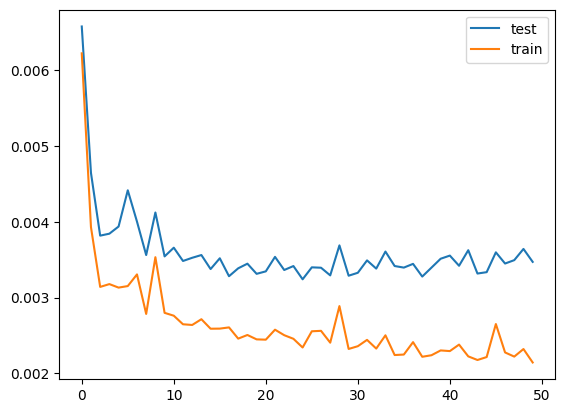

In [98]:
plt.plot(test_rmse, label="test")
plt.plot(train_rmse, label="train")
plt.legend()

In [99]:
STORE = 1
DEPT = 1
view_train_df = train_df.copy()
view_val_df = val_df.copy()
view_test_df= final_test_df.copy()

In [100]:
# specific_view_train_df = view_train_df[(view_train_df["t( 1) Store-"+str(STORE)+""] == 1) & (view_train_df["t( 1) Dept-"+str(DEPT)+""] == 1)]
# specific_view_val_df = view_val_df[(view_val_df["t( 1) Store-"+str(STORE)+""] == 1) & (view_val_df["t( 1) Dept-"+str(DEPT)+""] == 1)]
# specific_view_test_df = view_test_df[(view_test_df["t( 1) Store-"+str(STORE)+""] == 1) & (view_test_df["t( 1) Dept-"+str(DEPT)+""] == 1)]
# real_result_view = pd.concat([specific_view_train_df,specific_view_val_df,specific_view_test_df]).reset_index()
# #generate prediction
# train_pred_view = []
# val_pred_view = []
# test_pred_view = []


# plt.plot(real_result_view['t( '+str(lookback)+') Weekly-Diff'])

test RMSE 0.0026


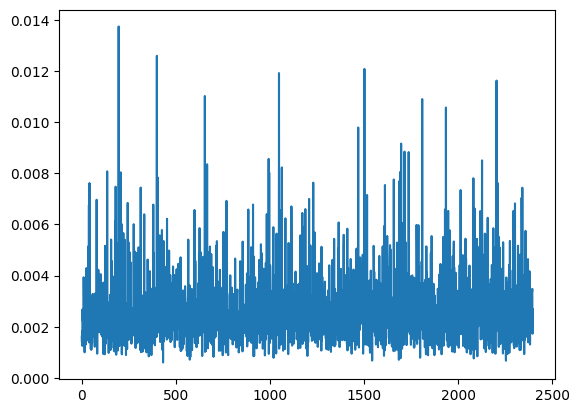

In [101]:
# final loss

test_rmse_list = []

loss_fn = torch.nn.MSELoss().to(device)
model.eval()
for X_batch, y_batch in test_loader:
  y_pred = model(X_batch)
  test_rmse = np.sqrt(loss_fn(y_pred, y_batch).cpu().detach().numpy())
  test_rmse_list += [test_rmse]

test_rmse = sum(test_rmse_list) / len(test_rmse_list)

plt.plot(test_rmse_list, label="final test for loss")
print("test RMSE %.4f" % (test_rmse))

In [102]:
print("test RMSE %.4f" % (test_rmse))

test RMSE 0.0026


In [103]:
view_s_train_df = view_train_df.copy()
view_s_val_df = view_val_df.copy()
view_s_test_df = view_test_df.copy()

view_s_train_df = view_s_train_df[(view_s_train_df["t( 1) Store-"+str(STORE)+""] == 1) & (view_s_train_df["t( 1) Dept-"+str(DEPT)+""] == 1)]
view_s_val_df = view_s_val_df[(view_s_val_df["t( 1) Store-"+str(STORE)+""] == 1) & (view_s_val_df["t( 1) Dept-"+str(DEPT)+""] == 1)]
view_s_test_df = view_s_test_df[(view_s_test_df["t( 1) Store-"+str(STORE)+""] == 1) & (view_s_test_df["t( 1) Dept-"+str(DEPT)+""] == 1)]

In [104]:
view_s_train_df

t( 0) Weekly-Diff  t( 1) Temperature  t( 1) Fuel_Price   t( 1) CPI  \
0            21114.99              39.93             2.514  211.289143   
1            -4443.94              46.63             2.561  211.319643   
2           -22192.01              46.50             2.625  211.350143   
3             2424.36              57.79             2.667  211.380643   
4             -784.51              54.58             2.720  211.215635   
..                ...                ...               ...         ...   
81             739.90              76.00             3.546  215.861056   
82            2469.41              79.94             3.526  216.041053   
83             788.80              75.80             3.467  216.375825   
84            -676.18              79.69             3.355  216.710597   
85             478.38              69.31             3.285  217.045368   

    t( 1) Unemployment  t( 1) Store-1  t( 1) Store-2  t( 1) Store-3  \
0                8.106            1.0            0.0            0.0   
1                8.106            1.0            0.0            0.0   
2                8.106            1.0            0.0            0.0   
3                8.106            1.0            0.0            0.0   
4                8.106            1.0            0.0            0.0   
..                 ...            ...            ...            ...   
81               7.962            1.0            0.0            0.0   
82               7.962            1.0            0.0            0.0   
83               7.962            1.0            0.0            0.0   
84               7.962            1.0            0.0            0.0   
85               7.866            1.0            0.0            0.0   

    t( 1) Store-4  t( 1) Store-5  ...  t( 10) Dept-99  t( 10) Dept-77  \
0             0.0            0.0  ...             0.0             0.0   
1             0.0            0.0  ...             0.0             0.0   
2             0.0            0.0  ...             0.0             0.0   
3             0.0            0.0  ...             0.0             0.0   
4             0.0            0.0  ...             0.0             0.0   
..            ...            ...  ...             ...             ...   
81            0.0            0.0  ...             0.0             0.0   
82            0.0            0.0  ...             0.0             0.0   
83            0.0            0.0  ...             0.0             0.0   
84            0.0            0.0  ...             0.0             0.0   
85            0.0            0.0  ...             0.0             0.0   

    t( 10) Dept-39  t( 10) Dept-50  t( 10) Dept-43  t( 10) Dept-65  \
0              0.0             0.0             0.0             0.0   
1              0.0             0.0             0.0             0.0   
2              0.0             0.0             0.0             0.0   
3              0.0             0.0             0.0             0.0   
4              0.0             0.0             0.0             0.0   
..             ...             ...             ...             ...   
81             0.0             0.0             0.0             0.0   
82             0.0             0.0             0.0             0.0   
83             0.0             0.0             0.0             0.0   
84             0.0             0.0             0.0             0.0   
85             0.0             0.0             0.0             0.0   

    t( 10) IsHoliday  t( 10) Weekly-Diff  t( 10) Year-Sin  t( 10) Year-Cos  
0                0.0            -1451.61         0.986731         0.162366  
1                0.0              409.76         0.999079         0.042905  
2                0.0              858.83         0.997018        -0.077175  
3                0.0             1512.80         0.980575        -0.196143  
4                0.0            -4153.70         0.949990        -0.312281  
..               ...                 ...              ...              ...  
81   

In [105]:
def final_normalize_x(local_lookback, local_train_df, local_target_df):
  local_feature_columns = [column for column in local_train_df.columns]
  local_feature_columns.remove("t( "+str(local_lookback)+") Weekly-Diff")
  for column in local_feature_columns:
      if local_train_df[column].max() > 1:
          x_min = local_train_df[column].min()
          x_max = local_train_df[column].max()

          local_target_df[column] = (local_target_df[column] - x_min) / (x_max - x_min)


def final_normalize_y(local_lookback, local_train_df, local_target_df):
  test_col = "t( "+str(local_lookback)+") Weekly-Diff"
  y_min = local_train_df[test_col].min()
  y_max = local_train_df[test_col].max()

  local_target_df[test_col] = (local_target_df[test_col] - y_min) / (y_max - y_min)

  return y_min, y_max


def get_data_for_model(local_lookback, table):
  x = np.zeros((len(table), local_lookback, len(columns_per_row)+1))
  y = np.zeros(len(table))
  for i in range(local_lookback):
    x[:,i,0] = table['t( '+str(i)+') Weekly-Diff']

    for j ,column in enumerate(columns_per_row):
      x[:,i,j+1]= table["t( "+str(i+1)+") "+column]

    y[:]= table["t( "+str(lookback)+") Weekly-Diff"]

  return x, y

def create_train_test_loaders(local_x, local_y):
  local_batch_size = 32

  local_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

  local_dataset = torch.utils.data.TensorDataset(torch.tensor(local_x, dtype=torch.float32).to(local_device),
                                                       torch.tensor(local_y, dtype=torch.float32).to(local_device))
  local_loader = torch.utils.data.DataLoader(local_dataset, batch_size=local_batch_size)

  return local_dataset, local_loader

In [106]:
final_normalize_x(lookback, view_train_df, view_s_train_df)
final_normalize_x(lookback, view_train_df, view_s_val_df)
final_normalize_x(lookback, view_train_df, view_s_test_df)

y_min, y_max = final_normalize_y(lookback, view_train_df, view_s_train_df)
y_min, y_max = final_normalize_y(lookback, view_train_df, view_s_val_df)
y_min, y_max = final_normalize_y(lookback, view_train_df, view_s_test_df)

view_x_train, view_y_train = get_data_for_model(lookback, view_s_train_df)
view_x_val, view_y_val = get_data_for_model(lookback, view_s_val_df)
view_x_test, view_y_test = get_data_for_model(lookback, view_s_test_df)

view_train_dataset, view_train_loader = create_train_test_loaders(view_x_train, view_y_train)
view_val_dataset, view_val_loader = create_train_test_loaders(view_x_val, view_y_val)
view_test_dataset, view_test_loader = create_train_test_loaders(view_x_test, view_y_test)

In [107]:
# final test
sections = [view_train_loader, view_val_loader, view_test_loader]

y_pred_list = []
y_true_list = []

loss_fn = torch.nn.MSELoss().to(device)

model.eval()

for section_loader in sections:
  y_pred_section_list = []
  y_true_section_list = []
  for x, y in section_loader:
    y_pred = model(x)
    y_pred_section_list += list(map(float, list(y_pred)))
    y_true_section_list += list(map(float, list(y)))

  y_pred_list += [y_pred_section_list]
  y_true_list += [y_true_section_list]


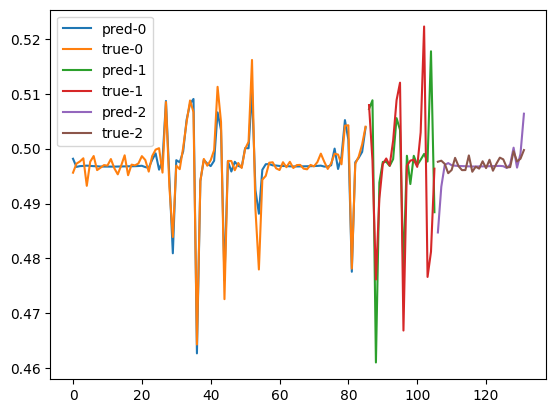

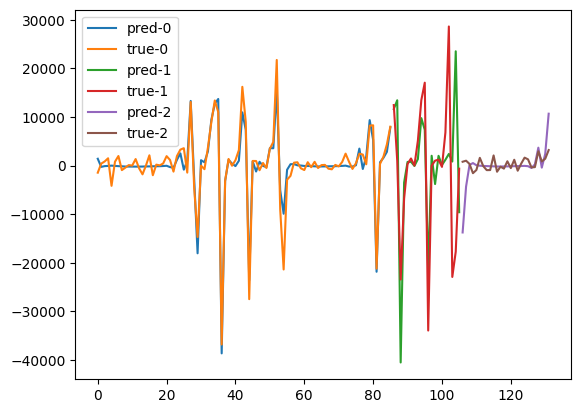

In [108]:
j = 0
for i in range(len(sections)):
  y_pred_section_list = y_pred_list[i]
  y_true_section_list = y_true_list[i]

  plt.plot(range(j, j + len(y_pred_section_list)), y_pred_section_list, label='pred-' + str(i))
  plt.plot(range(j, j + len(y_true_section_list)), y_true_section_list, label='true-' + str(i))

  j += len(y_pred_section_list)

plt.legend()
plt.show()

j = 0
for i in range(len(sections)):
  y_pred_section_list = y_pred_list[i]
  y_true_section_list = y_true_list[i]

  y_pred_section_list = [y_min + (y_max - y_min) * v for v in y_pred_section_list]
  y_true_section_list = [y_min + (y_max - y_min) * v for v in y_true_section_list]

  plt.plot(range(j, j + len(y_pred_section_list)), y_pred_section_list, label='pred-' + str(i))
  plt.plot(range(j, j + len(y_true_section_list)), y_true_section_list, label='true-' + str(i))

  j += len(y_pred_section_list)

plt.legend()
plt.show()

In [109]:
def plot_test_lstm(store, dept):
  # view
  view_s_train_df = view_train_df.copy()
  view_s_val_df = view_val_df.copy()
  view_s_test_df = view_test_df.copy()

  view_s_train_df = view_s_train_df[(view_s_train_df["t( 1) Store-"+str(store)+""] == 1) & (view_s_train_df["t( 1) Dept-"+str(dept)+""] == 1)]
  view_s_val_df = view_s_val_df[(view_s_val_df["t( 1) Store-"+str(store)+""] == 1) & (view_s_val_df["t( 1) Dept-"+str(dept)+""] == 1)]
  view_s_test_df = view_s_test_df[(view_s_test_df["t( 1) Store-"+str(store)+""] == 1) & (view_s_test_df["t( 1) Dept-"+str(dept)+""] == 1)]

  # load
  final_normalize_x(lookback, view_train_df, view_s_train_df)
  final_normalize_x(lookback, view_train_df, view_s_val_df)
  final_normalize_x(lookback, view_train_df, view_s_test_df)

  y_min, y_max = final_normalize_y(lookback, view_train_df, view_s_train_df)
  y_min, y_max = final_normalize_y(lookback, view_train_df, view_s_val_df)
  y_min, y_max = final_normalize_y(lookback, view_train_df, view_s_test_df)

  view_x_train, view_y_train = get_data_for_model(lookback, view_s_train_df)
  view_x_val, view_y_val = get_data_for_model(lookback, view_s_val_df)
  view_x_test, view_y_test = get_data_for_model(lookback, view_s_test_df)

  view_train_dataset, view_train_loader = create_train_test_loaders(view_x_train, view_y_train)
  view_val_dataset, view_val_loader = create_train_test_loaders(view_x_val, view_y_val)
  view_test_dataset, view_test_loader = create_train_test_loaders(view_x_test, view_y_test)

  # test all
  sections = [view_train_loader, view_val_loader, view_test_loader]

  y_pred_list = []
  y_true_list = []

  loss_fn = torch.nn.MSELoss().to(device)

  model.eval()

  for section_loader in sections:
    y_pred_section_list = []
    y_true_section_list = []
    for x, y in section_loader:
      y_pred = model(x)
      y_pred_section_list += list(map(float, list(y_pred)))
      y_true_section_list += list(map(float, list(y)))

    y_pred_list += [y_pred_section_list]
    y_true_list += [y_true_section_list]

  # view
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

  j = 0
  for i in range(len(sections)):
    y_pred_section_list = y_pred_list[i]
    y_true_section_list = y_true_list[i]

    ax1.plot(range(j, j + len(y_pred_section_list)), y_pred_section_list, label='pred-' + str(i))
    ax1.plot(range(j, j + len(y_true_section_list)), y_true_section_list, label='true-' + str(i))

    j += len(y_pred_section_list)

  ax1.legend()

  j = 0
  for i in range(len(sections)):
    y_pred_section_list = y_pred_list[i]
    y_true_section_list = y_true_list[i]

    y_pred_section_list = [y_min + (y_max - y_min) * v for v in y_pred_section_list]
    y_true_section_list = [y_min + (y_max - y_min) * v for v in y_true_section_list]

    ax2.plot(range(j, j + len(y_pred_section_list)), y_pred_section_list, label='pred-' + str(i))
    ax2.plot(range(j, j + len(y_true_section_list)), y_true_section_list, label='true-' + str(i))

    j += len(y_pred_section_list)

  ax2.legend()

  plt.show()

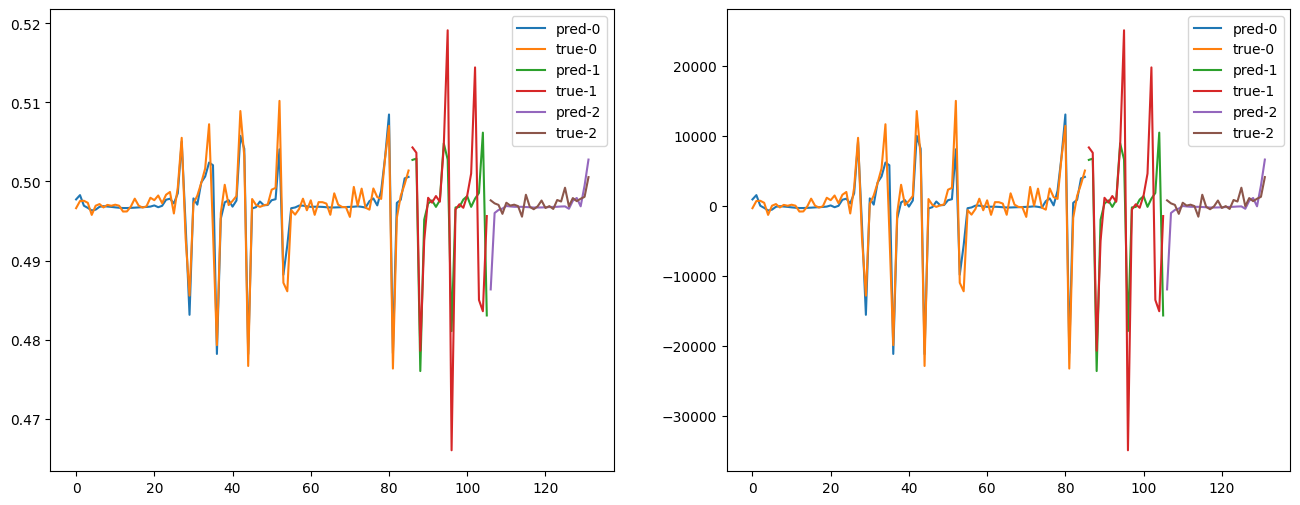

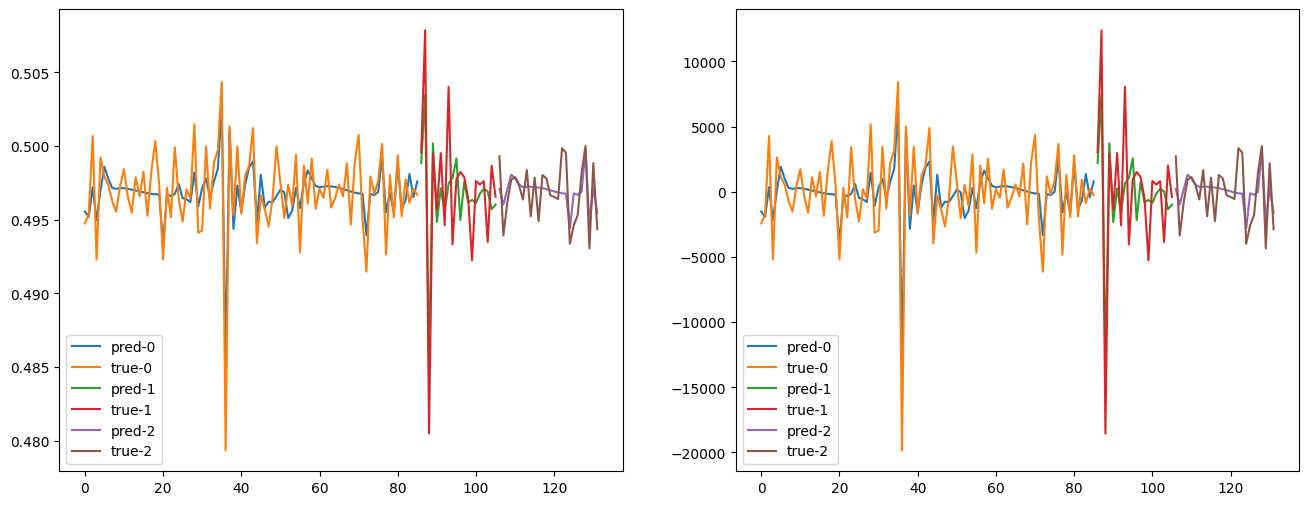

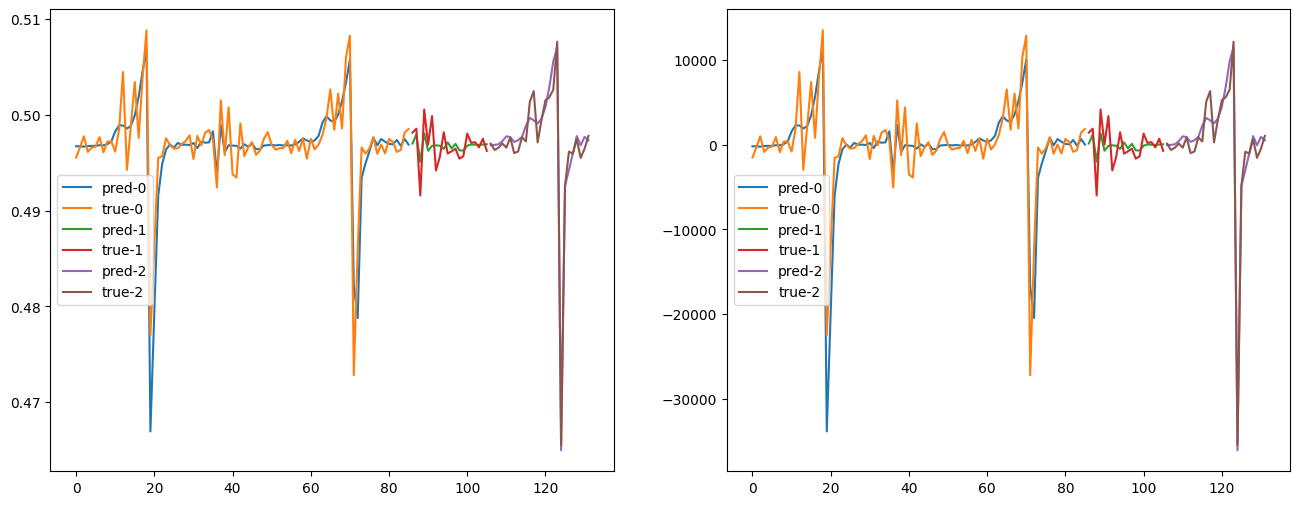

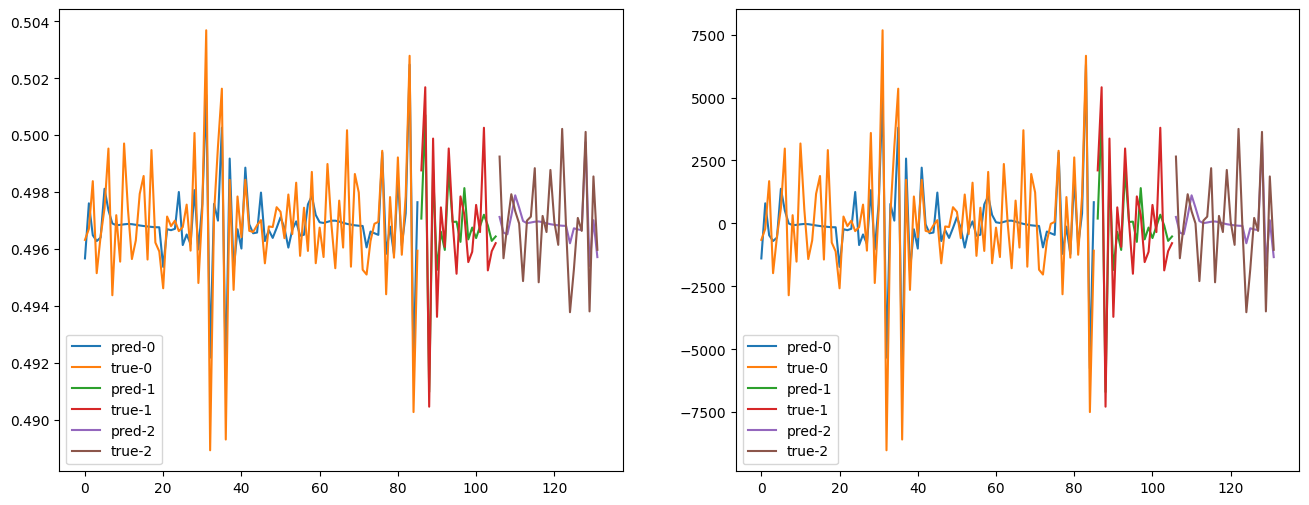

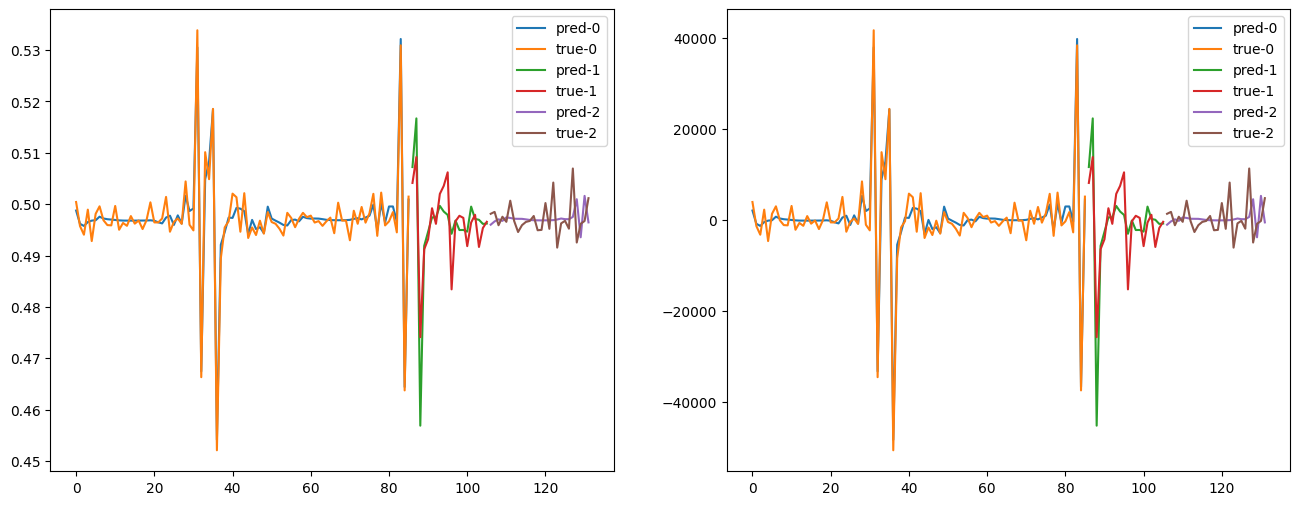

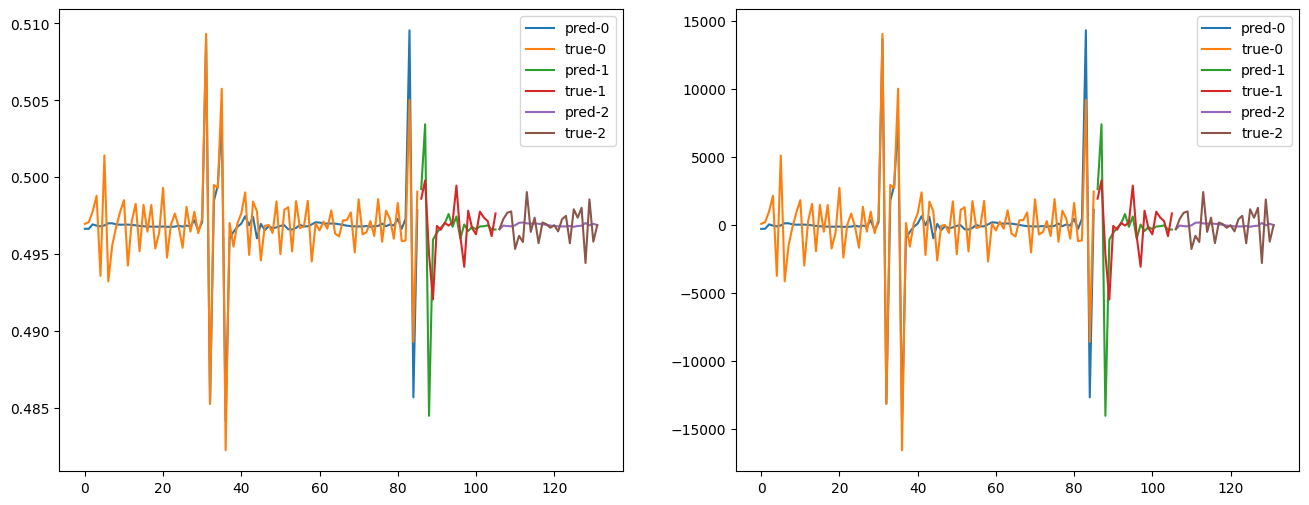

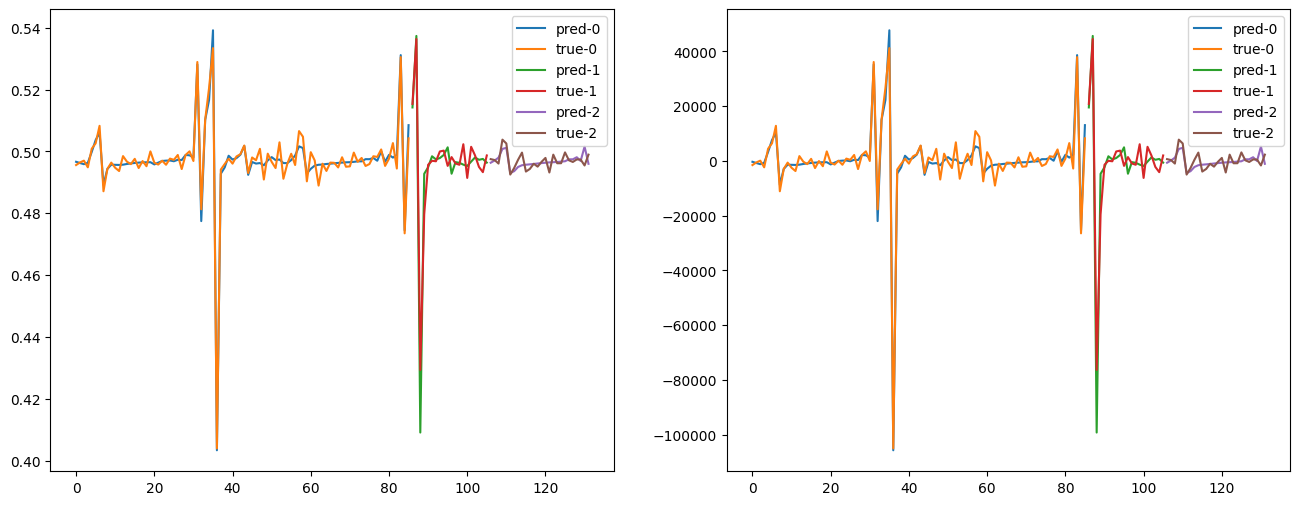

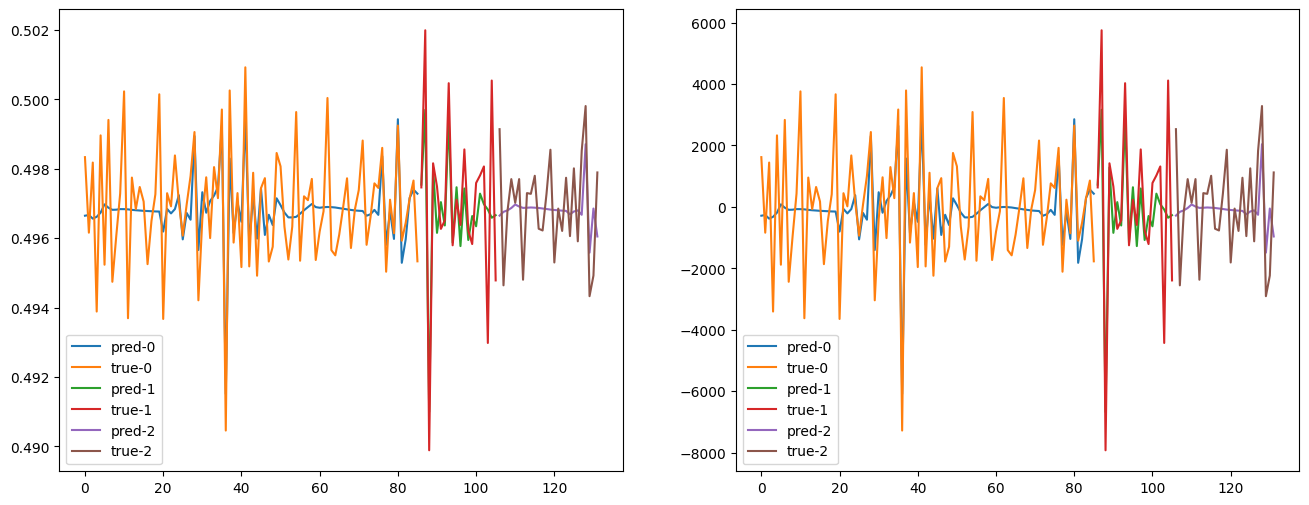

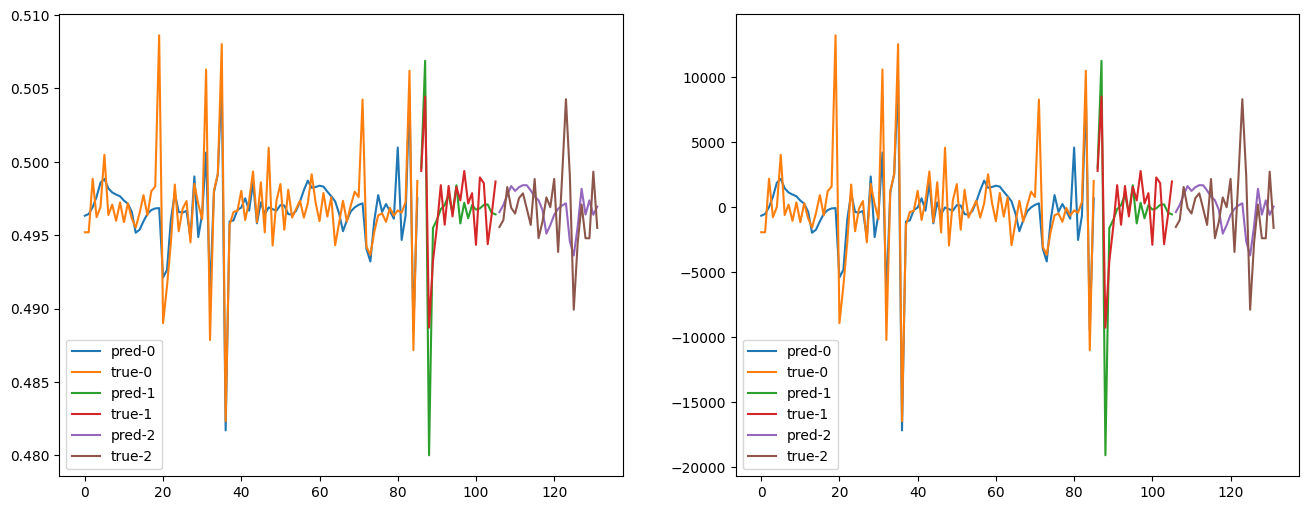

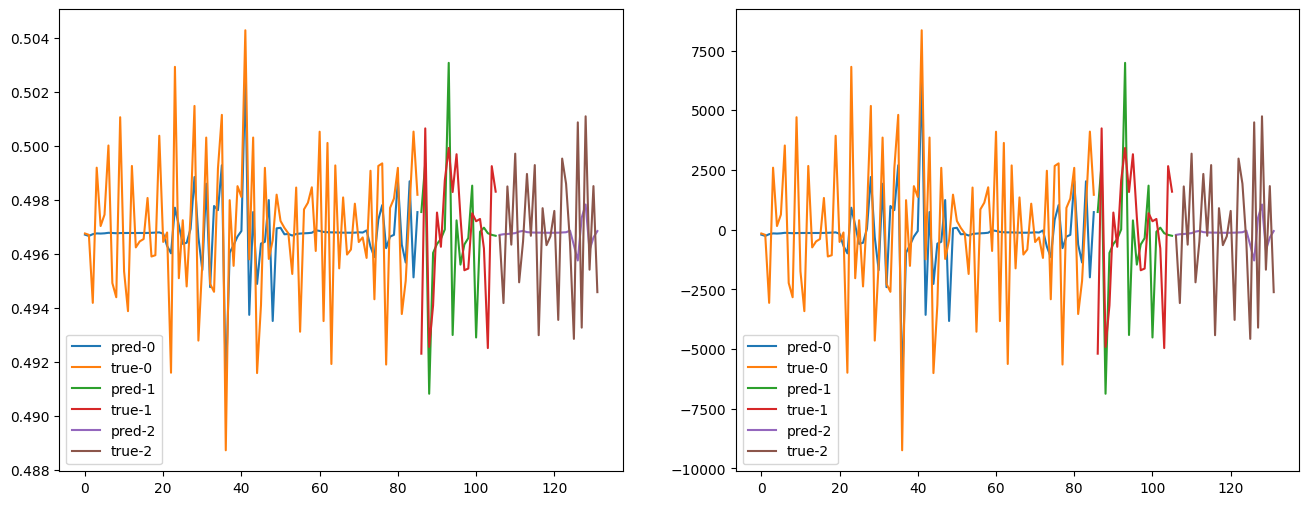

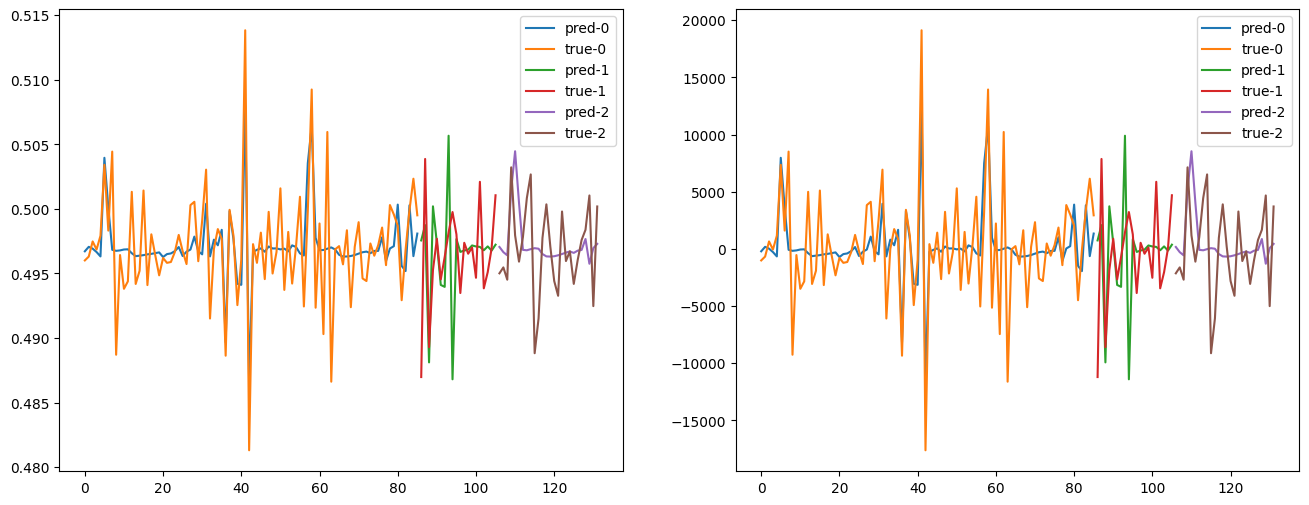

In [110]:
for i in range(1, 12):
  plot_test_lstm(8, i)